Este trabalho é uma grande exploração do mercado de criptomoedas, analisando tendencias de crescimento e sua correlaçào com outros mercados. Utiizamos primariamente dados do Yahoo Finance, junto ao seaborn e pandas, para criar gráficos e tabelas que nos ajudam a interpretar o mercado de criptomoedas, testas nossas hipóteses e buscan correlações entre valores e eventos distintos.

Analisaremos períodos após o ano de 2017, pois antes disso o mercado cripto era muito pouco consolidado, causando problemas nos gráficos, modelos e interpretações que visamos fazer


##Bases de dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas-datareader
import pandas_datareader as pdr
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [ ]:
# Cryptos
btc1 = web.get_data_yahoo('BTC-USD')["Close"]
eth1 = web.get_data_yahoo('ETH-USD')["Close"]
ltc1 = web.get_data_yahoo('LTC-USD')["Close"]
doge1 = web.get_data_yahoo('DOGE-USD')["Close"]
xrp1 = web.get_data_yahoo('XRP-USD')["Close"]
ada1 = web.get_data_yahoo('ADA-USD')["Close"]
bnb1 = web.get_data_yahoo('BNB-USD')["Close"]
# Cryptos a partir de 2017
ltc = web.get_data_yahoo('LTC-USD',start='2017-01-01')["Close"]
btc = web.get_data_yahoo('BTC-USD',start='2017-01-01')["Close"]
doge = web.get_data_yahoo('DOGE-USD',start='2017-01-01')["Close"]
eth = web.get_data_yahoo('ETH-USD',start='2017-01-01')["Close"]
xrp = web.get_data_yahoo('XRP-USD',start='2017-01-01')["Close"]
ada = web.get_data_yahoo('ADA-USD',start='2017-01-01')["Close"]
bnb = web.get_data_yahoo('BNB-USD',start='2017-01-01')["Close"]
indicecmc = web.get_data_yahoo('^CMC200',start='2017-01-01')["Close"]
# Partes de Computador
nvidea = web.get_data_yahoo('NVDA')["Adj Close"]
intel = web.get_data_yahoo('INTC')["Adj Close"]
amd = web.get_data_yahoo('AMD')["Adj Close"]
# Bolsas
bovespa = web.get_data_yahoo('BOVA11.SA')["Adj Close"]
jones = web.get_data_yahoo('^DJI')["Adj Close"]
nasdaq = web.get_data_yahoo('^IXIC')["Adj Close"]
SP500 =web.get_data_yahoo('^GSPC')["Adj Close"]
# Outros
crude = web.get_data_yahoo('CL=F')["Close"]
ouro =web.get_data_yahoo('GC=F')["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
# Cryptos no ano de 2017
btc2017 = web.get_data_yahoo('BTC-USD', start='2017-01-01', end='2018-01-01')["Close"]
eth2017 = web.get_data_yahoo('ETH-USD', start='2017-01-01', end='2018-01-01')["Close"]
xrp2017 = web.get_data_yahoo('XRP-USD', start='2017-01-01', end='2018-01-01')["Close"]
bnb2017 = web.get_data_yahoo('BNB-USD', start='2017-01-01', end='2018-01-01')["Close"]
ada2017 = web.get_data_yahoo('ADA-USD', start='2017-01-01', end='2018-01-01')["Close"]
ltc2017 = web.get_data_yahoo('LTC-USD', start='2017-01-01', end='2018-01-01')["Close"]
crude1 = web.get_data_yahoo('CL=F', start='2017-01-01')["Close"]
ouro1 = web.get_data_yahoo('GC=F', start='2017-01-01')["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Como criar plots que relacionam tempo com valor valor close
#primeiro a DATA de cada valor deve ser inserida como uma coluna no dataframe
ETHR = web.get_data_yahoo('ETH-USD',start='2017-01-01') #pegando o dataframe
ETHRAUX = ETHR
ETHRAUX['Date']=ETHR.index 
print(ETHRAUX)
ETHR.set_index(pd.DatetimeIndex(ETHR['Date']), inplace=True)
print(ETHR) #bom, os dois data frames ganharam a coluna data. Deve dar pra deixar a função mais limpa, mas essa funciona
# Agora vou transformar a data em um número ordinal
df=ETHR
from datetime import date
df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
print(df) #df é igual a ETHR, mas com a coluna date_ordinal

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...       Volume       Date
Date                                  ...                        
2017-01-01     7.982310     8.471230  ...     14731700 2017-01-01
2017-01-02     8.170870     8.436330  ...     14579600 2017-01-02
2017-01-03     8.374580     9.996800  ...     33625200 2017-01-03
2017-01-04     9.709290    11.276400  ...     41051200 2017-01-04
2017-01-05    11.286800    11.890900  ...     41557400 2017-01-05
...                 ...          ...  ...          ...        ...
2021-11-23  4089.680420  4385.483398  ...  22133497059 2021-11-23
2021-11-24  4340.036133  4376.875977  ...  21838037128 2021-11-24
2021-11-25  4271.394531  4550.518066  ...  18705358318 2021-11-25
2021-11-26  4522.208984  4550.842285  ...  26281795488 2021-11-26
2021-11-27  4039.785400  4181.841797  ...  16862448640 2021-11-27

[1788 rows x 7 columns]
                   Open         High  ...       

[Text(0, 0, '2016-02-06'),
 Text(0, 0, '2016-10-13'),
 Text(0, 0, '2017-06-20'),
 Text(0, 0, '2018-02-25'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2019-07-10'),
 Text(0, 0, '2020-03-16'),
 Text(0, 0, '2020-11-21'),
 Text(0, 0, '2021-07-29'),
 Text(0, 0, '2022-04-05')]

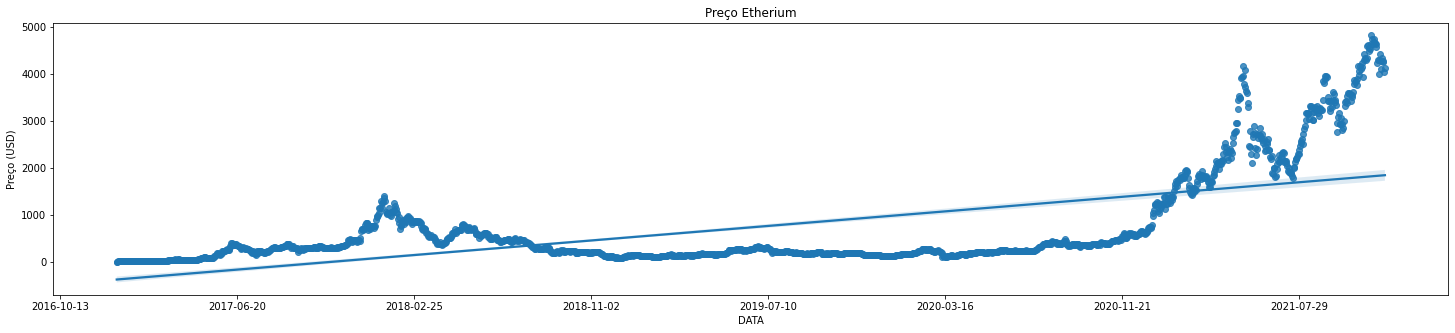

In [ ]:
#pronto, agora é só usar x como date ordinal
f, ax = plt.subplots(figsize=(25, 5)) #controla o tamanho do gráfico
ax = sns.regplot(
    data=df,
    x='date_ordinal', y='Close',
)
ax.set_xlabel('DATA')
ax.set_title('Preço Etherium')
ax.set_ylabel('Preço (USD)')
#Agora vamos renomear as datas do eixo x para o valor Date correspondente ao valor date_ordinal
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

#fazer 

Podemos fazer algumas análises interessantes a partir deste gráfico
A primeira é que a variação dos preços do Etherium passou por alguns períodos distintos. 
1.   Vimos um primeiro pico no final de 2017, seguido por um perído de constante desvalorização da moeda
2.   Depois, registramos um período de relativa estabilidade da moeda, que vai da segunda metade de 2018 até novembro de 2020
3. O terceiro período se inicia em dezembro de 2020, quando o valor das criptomoeda dá um salto

# Análise da regressão linear dos preços do Etherium

## Modelos de regressão LOWESS

O modelo de regressão linear não conseguiu modelar bem a flutuação de preços do Etherium. É possível que o modelo se torne mais bem comportado caso ele 
fosse quebrado entre os diferentes periodos que listei anteriormente. A função seaborn também possui diferentes formulas para regressão linear, que podem gerar modelos mais precisos


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, '2016-02-06'),
 Text(0, 0, '2016-10-13'),
 Text(0, 0, '2017-06-20'),
 Text(0, 0, '2018-02-25'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2019-07-10'),
 Text(0, 0, '2020-03-16'),
 Text(0, 0, '2020-11-21'),
 Text(0, 0, '2021-07-29'),
 Text(0, 0, '2022-04-05')]

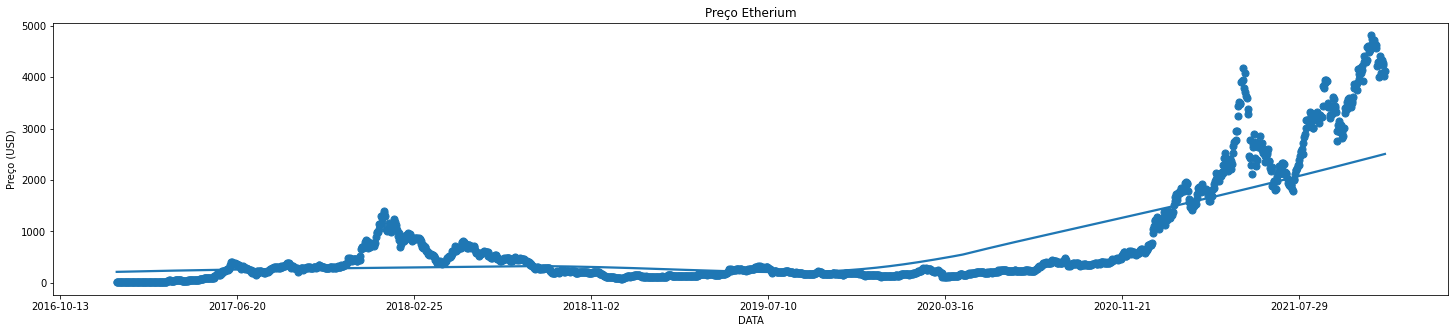

In [ ]:
#Vamos montar um modelo mais preciso utilizando a regressão lowess
f, ax = plt.subplots(figsize=(25, 5)) #controla o tamanho do gráfico
ax = sns.regplot(
    data=df,
    x='date_ordinal', y='Close', logistic=False, robust=False, lowess=True, x_estimator=np.mean,
    n_boot=1000, order=1, x_ci = 100
)
ax.set_xlabel('DATA')
ax.set_title('Preço Etherium')
ax.set_ylabel('Preço (USD)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)


[*********************100%***********************]  1 of 1 completed
                  Open        High  ...       Date  date_ordinal
Date                                ...                         
2017-01-01    7.982310    8.471230  ... 2017-01-01        736330
2017-01-02    8.170870    8.436330  ... 2017-01-02        736331
2017-01-03    8.374580    9.996800  ... 2017-01-03        736332
2017-01-04    9.709290   11.276400  ... 2017-01-04        736333
2017-01-05   11.286800   11.890900  ... 2017-01-05        736334
...                ...         ...  ...        ...           ...
2018-05-28  573.044983  576.049011  ... 2018-05-28        736842
2018-05-29  516.148010  572.263977  ... 2018-05-29        736843
2018-05-30  566.830017  583.135986  ... 2018-05-30        736844
2018-05-31  558.497009  585.538025  ... 2018-05-31        736845
2018-06-01  578.671997  589.093018  ... 2018-06-01        736846

[517 rows x 8 columns]


[Text(0, 0, '2016-12-02'),
 Text(0, 0, '2017-03-12'),
 Text(0, 0, '2017-06-20'),
 Text(0, 0, '2017-09-28'),
 Text(0, 0, '2018-01-06'),
 Text(0, 0, '2018-04-16'),
 Text(0, 0, '2018-07-25')]

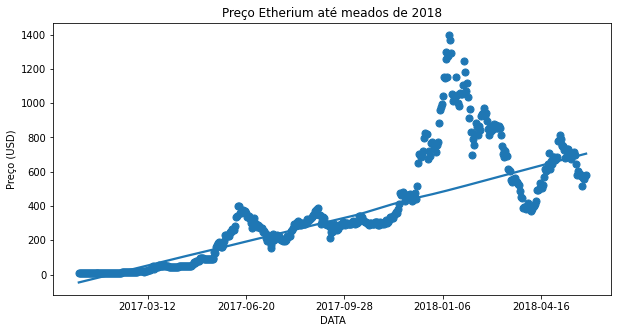

In [ ]:
#O gráfico acima é consideravelmente mais preciso que a regressão linear simples, mas ainda é extremamente falho
#Vamos tentar separar a regressão em estágios
ETHR = web.get_data_yahoo('ETH-USD',start='2017-01-01',end= '2018-06-01') #pegando o dataframe
ETHRAUX = ETHR
ETHRAUX['Date']=ETHR.index 
ETHR.set_index(pd.DatetimeIndex(ETHR['Date']), inplace=True)
df=ETHR
from datetime import date
df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
print(df) #df é igual a ETHR, mas com a coluna date_ordinal
#pronto, agora é só usar x como date ordinal
f, ax = plt.subplots(figsize=(10, 5)) #controla o tamanho do gráfico
ax = sns.regplot(
    data=df,
    x='date_ordinal', y='Close', logistic=False, robust=False, lowess=True, x_estimator=np.mean,
    n_boot=1000, order=1, x_ci = 100
)
ax.set_xlabel('DATA')
ax.set_title('Preço Etherium até meados de 2018')
ax.set_ylabel('Preço (USD)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...       Date  date_ordinal
Date                                ...                         
2018-06-01  578.671997  589.093018  ... 2018-06-01        736846
2018-06-02  580.429016  597.077026  ... 2018-06-02        736847
2018-06-03  591.258972  624.513000  ... 2018-06-03        736848
2018-06-04  619.437012  623.429016  ... 2018-06-04        736849
2018-06-05  593.406006  611.330017  ... 2018-06-05        736850
...                ...         ...  ...        ...           ...
2020-11-26  570.514893  575.641479  ... 2020-11-26        737755
2020-11-27  519.108093  530.777161  ... 2020-11-27        737756
2020-11-28  517.597351  548.044861  ... 2020-11-28        737757
2020-11-29  538.264587  576.602417  ... 2020-11-29        737758
2020-11-30  575.757080  615.240540  ... 2020-11-30        737759

[910 rows x 8 columns]


[Text(0, 0, '2018-04-16'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2019-05-21'),
 Text(0, 0, '2019-12-07'),
 Text(0, 0, '2020-06-24'),
 Text(0, 0, '2021-01-10'),
 Text(0, 0, '2021-07-29')]

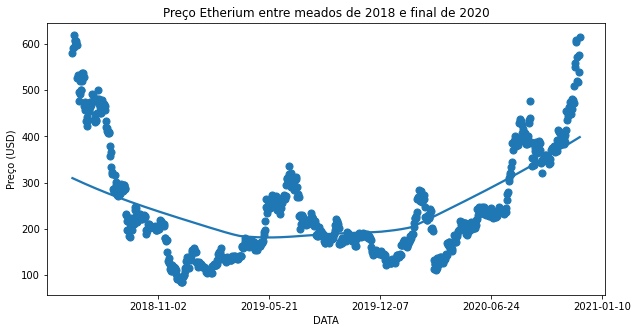

In [ ]:
#As estimativas do gráfica acima são consideravelmente melhores do que a dos gráficos anteriores, tendo maior dificuldade apenas no pico do início de 2018, que é um considerável outlier
#Vamos examinar agora o perío de "estabilidade" entre 2018 e 2021
ETHR = web.get_data_yahoo('ETH-USD',start='2018-06-01',end= '2020-11-30') #pegando o dataframe
ETHRAUX = ETHR
ETHRAUX['Date']=ETHR.index 
ETHR.set_index(pd.DatetimeIndex(ETHR['Date']), inplace=True)
df=ETHR
from datetime import date
df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
print(df) #df é igual a ETHR, mas com a coluna date_ordinal
#pronto, agora é só usar x como date ordinal
f, ax = plt.subplots(figsize=(10, 5)) #controla o tamanho do gráfico
ax = sns.regplot(
    data=df,
    x='date_ordinal', y='Close', logistic=False, robust=False, lowess=True, x_estimator=np.mean,
    n_boot=1000, order=1, x_ci = 100
)
ax.set_xlabel('DATA')
ax.set_title('Preço Etherium entre meados de 2018 e final de 2020')
ax.set_ylabel('Preço (USD)')
#Agora vamos renomear as datas do eixo x para o valor Date correspondente ao valor date_ordinal
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

[*********************100%***********************]  1 of 1 completed


[Text(0, 0, '2016-08-24'),
 Text(0, 0, '2017-03-12'),
 Text(0, 0, '2017-09-28'),
 Text(0, 0, '2018-04-16'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2019-05-21'),
 Text(0, 0, '2019-12-07'),
 Text(0, 0, '2020-06-24'),
 Text(0, 0, '2021-01-10'),
 Text(0, 0, '2021-07-29')]

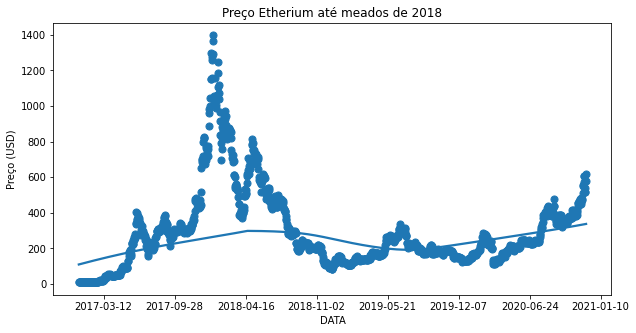

In [ ]:
#Vamos combinar os dois últimos gráficos em um só modelo
ETHR = web.get_data_yahoo('ETH-USD',start='2017-01-01',end= '2020-11-30') #pegando o dataframe
ETHRAUX = ETHR
ETHRAUX['Date']=ETHR.index 
ETHR.set_index(pd.DatetimeIndex(ETHR['Date']), inplace=True)
# Agora vou transformar a data em um número ordinal
df=ETHR
from datetime import date
df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
#pronto, agora é só usar x como date ordinal
f, ax = plt.subplots(figsize=(10, 5)) #controla o tamanho do gráfico
ax = sns.regplot(
    data=df,
    x='date_ordinal', y='Close', logistic=False, robust=False, lowess=True, x_estimator=np.mean,
    n_boot=1000, order=1, x_ci = 100
)
ax.set_xlabel('DATA')
ax.set_title('Preço Etherium até meados de 2018')
ax.set_ylabel('Preço (USD)')
#Agora vamos renomear as datas do eixo x para o valor Date correspondente ao valor date_ordinal
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...       Date  date_ordinal
Date                                  ...                         
2020-11-30   575.757080   615.240540  ... 2020-11-30        737759
2020-12-01   615.070312   635.160583  ... 2020-12-01        737760
2020-12-02   587.261597   604.022461  ... 2020-12-02        737761
2020-12-03   598.459229   622.452698  ... 2020-12-03        737762
2020-12-04   616.722778   618.983154  ... 2020-12-04        737763
...                 ...          ...  ...        ...           ...
2021-11-23  4089.680420  4385.483398  ... 2021-11-23        738117
2021-11-24  4340.036133  4376.875977  ... 2021-11-24        738118
2021-11-25  4271.394531  4550.518066  ... 2021-11-25        738119
2021-11-26  4522.208984  4550.842285  ... 2021-11-26        738120
2021-11-27  4039.785400  4181.841797  ... 2021-11-27        738121

[363 rows x 8 columns]


[Text(0, 0, '2020-10-02'),
 Text(0, 0, '2020-11-21'),
 Text(0, 0, '2021-01-10'),
 Text(0, 0, '2021-03-01'),
 Text(0, 0, '2021-04-20'),
 Text(0, 0, '2021-06-09'),
 Text(0, 0, '2021-07-29'),
 Text(0, 0, '2021-09-17'),
 Text(0, 0, '2021-11-06'),
 Text(0, 0, '2021-12-26')]

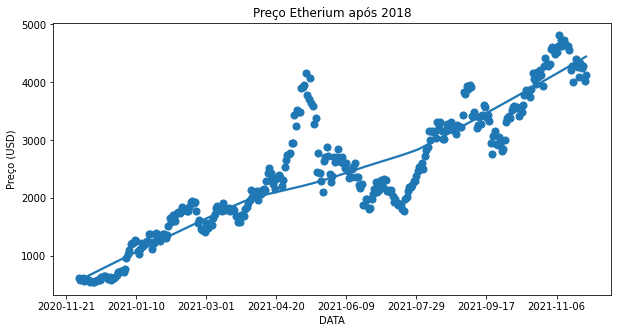

In [ ]:
#A linha resultande é relativamente precisa! Ela diverge do gráfico principalmente no pico de 2018, como já aconteceu em outros gráficos
#Por fim, vamos ver o gráfico desde a explosão de preços em dezembro de 2020
ETHR = web.get_data_yahoo('ETH-USD',start='2020-11-30') #pegando o dataframe
ETHRAUX = ETHR
ETHRAUX['Date']=ETHR.index 
ETHR.set_index(pd.DatetimeIndex(ETHR['Date']), inplace=True)
df=ETHR
from datetime import date
df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
print(df) #df é igual a ETHR, mas com a coluna date_ordinal
#pronto, agora é só usar x como date ordinal
f, ax = plt.subplots(figsize=(10, 5)) #controla o tamanho do gráfico
ax = sns.regplot(
    data=df,
    x='date_ordinal', y='Close', logistic=False, robust=False, lowess=True, x_estimator=np.mean,
    n_boot=1000, order=1, x_ci = 100
)
ax.set_xlabel('DATA')
ax.set_title('Preço Etherium após 2018')
ax.set_ylabel('Preço (USD)')
#Agora vamos renomear as datas do eixo x para o valor Date correspondente ao valor date_ordinal
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

###### A iha de regressão encontrada após dezembro de 2020 é extremamente próxima aos valores reais atingidos pelo Etherium!

##Conclusões

O comportamento do preço do Etherium parece mudar após certos choques. **Quando fazemos uma melhor divisão dos períodos analisados**, o seaborn consegue criar modelos de regressão linear consideravelmente mais precisos.

O Etherium se  encontra em uma tendência de forte crescimento, mas é possível que sua cotação pare de se comportar dessa forma, dando vez para **uma nova faze de queda e estagnação**, como aconteceu em meados de 2018.

Como iremos discutir posteriormente, **o mercado de criptomoedas é fortemente correlacionado** Isso significa que uma análise similarmente precisa poderia ser feita com o preço de outras criptomoedas caso simplesmente **trocassemos a cotação do Etherium para outra cripto disponível no Yahoo Finance** nas fórmulas acima. 

#Relações entre diferentes moedas

Quando analisamos os gráficos individuais de diferentes criptomoedas, vemos que elas passaram por flutuações similares. Isso acontece porque o mercado de criptomoedas é extremamente interligado

##Análise Geral

[*********************100%***********************]  8 of 8 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41476f0f90>,
      dtype=object)

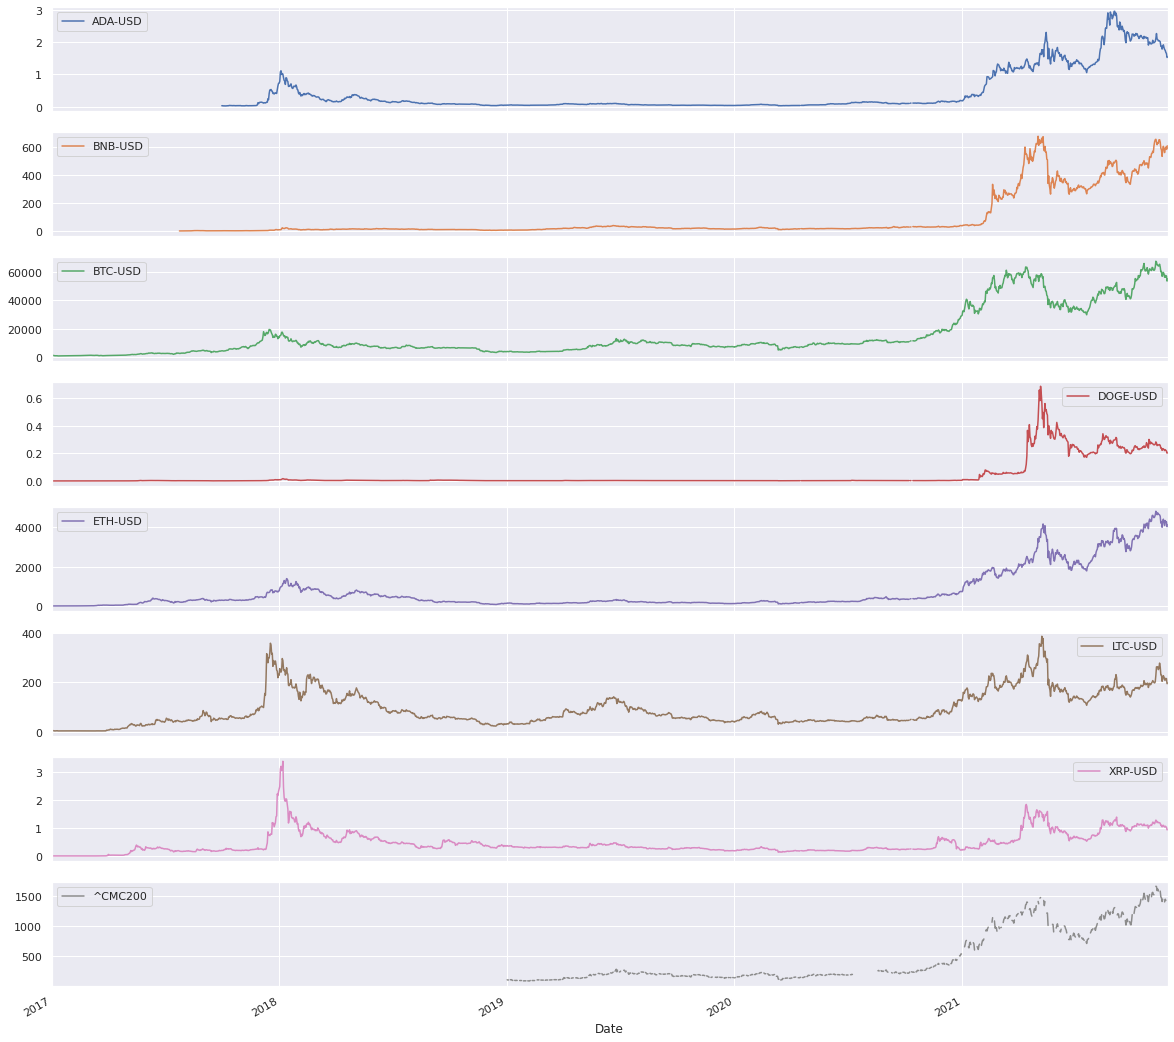

In [ ]:
moedas = web.get_data_yahoo(['BTC-USD','ETH-USD','LTC-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD','^CMC200'],start='2017-01-01')["Close"] 
#CMC200 é um índice feito pela Solacti com 200 das criptomoedas mais fortes, excluindo bitcoin. Ele é similar ao ISP500
sns.set()
moedas.plot(subplots=True,figsize=(20,20))

A única moeda que não apresentou o mesmo comportamento nesses três períodos foi o litecoin, que teve uma alta em meados de 2019.

A XRP é outra moeda com uma cotação divergente, tendo uma alta muita mais substancial em 2018 do que em 2020, e não atingindo resultados tão positivos como outras criptomoedas no mesmo período

O que explica, porém, o boom de criptomoedas ao final de 2020? Se a pandemia é responsável pela explosão de criptomoedas, porque ela se iniciou em 2021, e não em 2020?

[*********************100%***********************]  8 of 8 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41471e0110>,
      dtype=object)

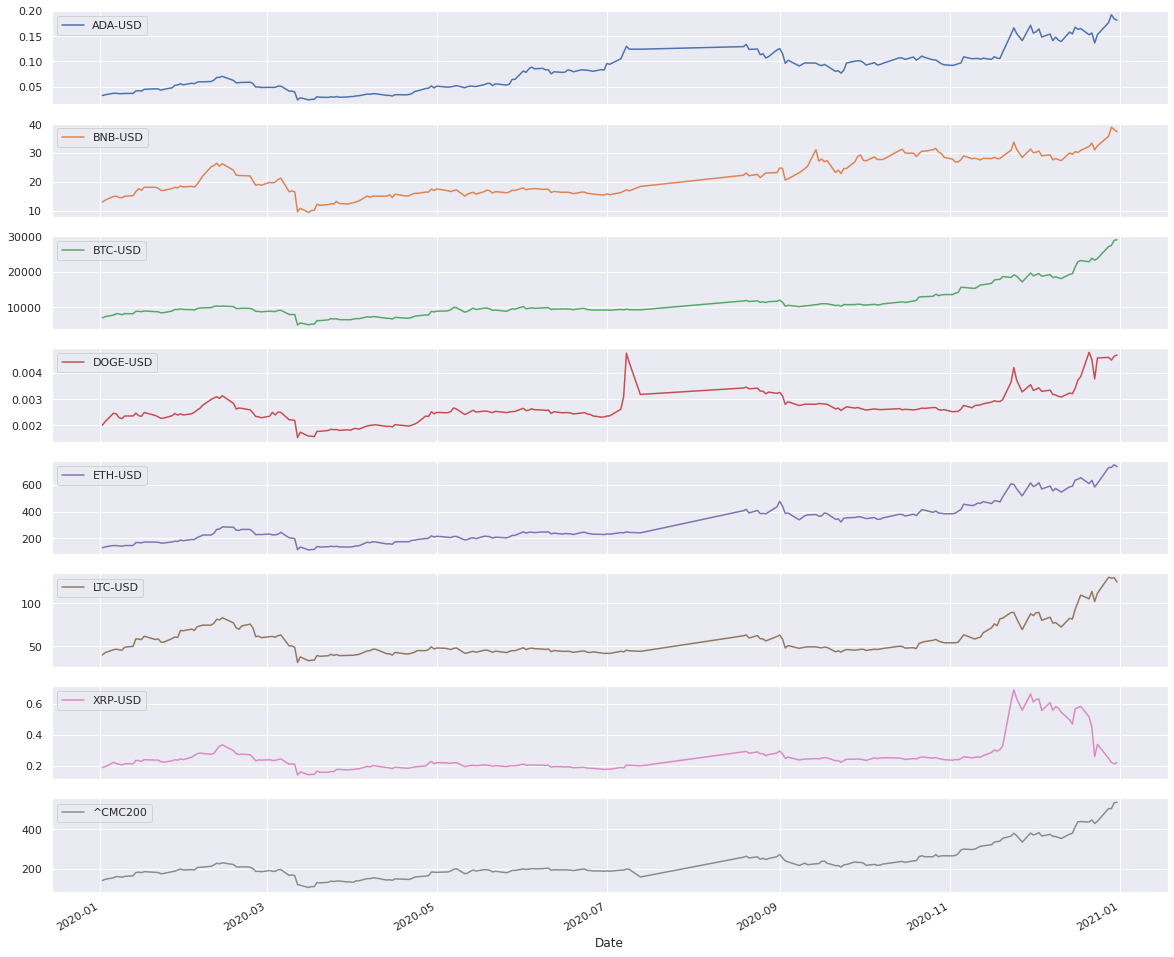

In [ ]:
#plot criptos 2020
moedas2020 = web.get_data_yahoo(['BTC-USD','ETH-USD','LTC-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD','^CMC200'],start='2020-01-01',end="2021-01-01")["Close"]
moedas2020 = moedas2020.dropna()
sns.set()
moedas2020.plot(subplots=True,figsize=(20,18))

[*********************100%***********************]  8 of 8 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f414715bcd0>,
      dtype=object)

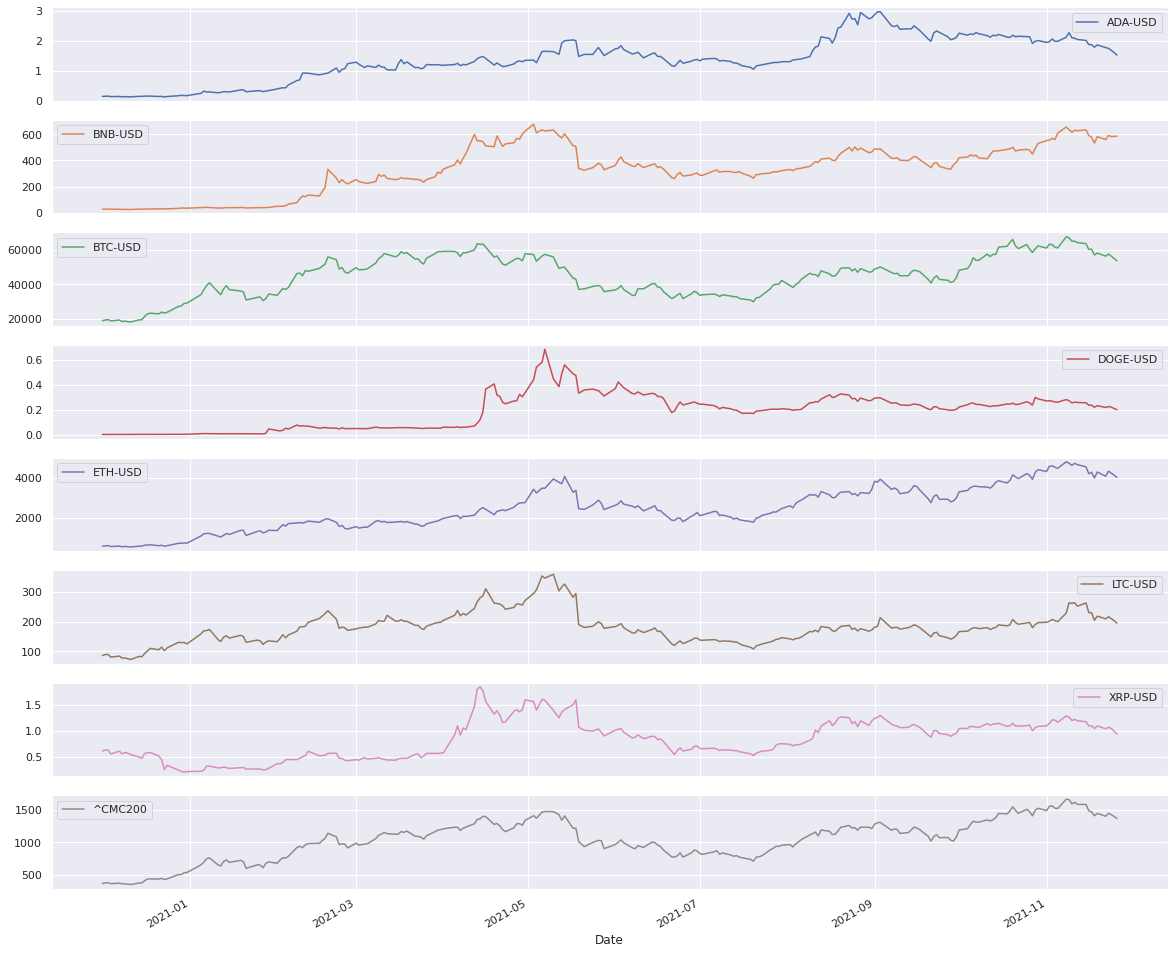

In [ ]:
#plot criptos 2021
moedas2021 = web.get_data_yahoo(['BTC-USD','ETH-USD','LTC-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD','^CMC200'],start='2020-12-01')["Close"]
moedas2021 = moedas2021.dropna()
sns.set()
moedas2021.plot(subplots=True,figsize=(20,18))


O ano de 2020 foi, em geral, bom para as criptomoedas, mas elas de fato explodiram em valor começando em dezembro de 2020. Moedas como a XRP **inicialmente não seguiram essa tendencia explosiva, mas foram puxadas por outras criptomoedas** ao longo de 2021. 

Em 20 de dezembro de 2020, Elon Musk expressou interesse em criptomoedas, especificamente o dogecoin. Isso levou gerou notícias sobre o aumento subto dessa criptomoeda - que tem valor principalmente especulativo e como uma piada de internet - e também um aumento geral no interesse em criptomoedas, notavelmente o bitcoin e etherium. Uma hipótese seria que os comentários de Elon Musk foram o **gatilho** que iniciou a alta de criptomoedas, que se manteve devido a seus **valores individuais como ativos financeiros.**

O ponto de vale observado na metade de 2021 se deve às tentativas da China em banir criptomoedas - que se intensificaram nesse período - e uma resposta dos mercado à segunda onda mundial de covid-19. O mercado de cripto em geral, porém, **rapidamente retornou** a seus picos explosivos do início do ano.

Nem todas as moedas acompanharam esse crescimento. Enquanto o Bitcoin, Etherium e BNB *voltaram aos seus valores de pico*, Litecoin e XRP traçaram caminhos similares ao dogecoin, **se estabilizando próximo ao valor de vale de 2021**. Para as três criptomoedas, esse valor ainda é substancialmente superior ao de 2020

##Análise comparativa entre criptomoedas selecionadas

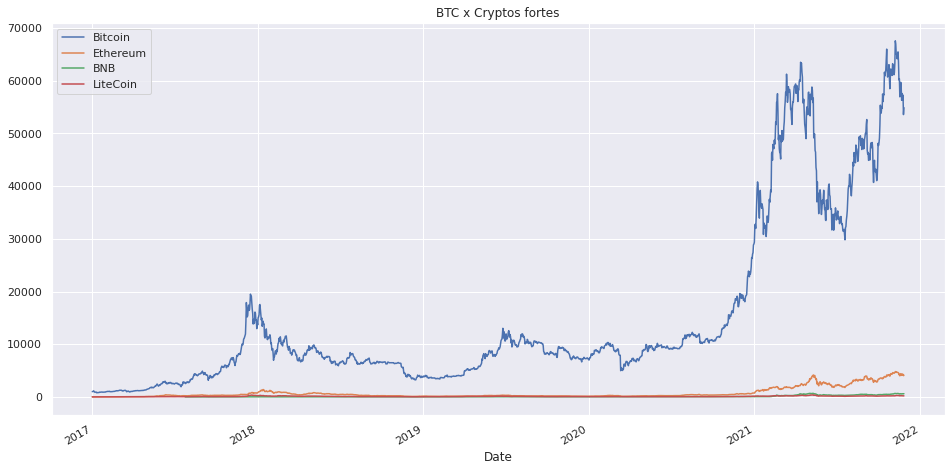

In [ ]:
btc.plot(figsize=(16,8),label="Bitcoin",title='BTC x Cryptos fortes')
eth.plot(label="Ethereum")
bnb.plot(label="BNB")
ltc.plot(label="LiteCoin")
plt.legend()
# Separamos as cryptos mais fortes.
# Percebemos que o Bitcoin tem mais influência no mercado do que as outras. 

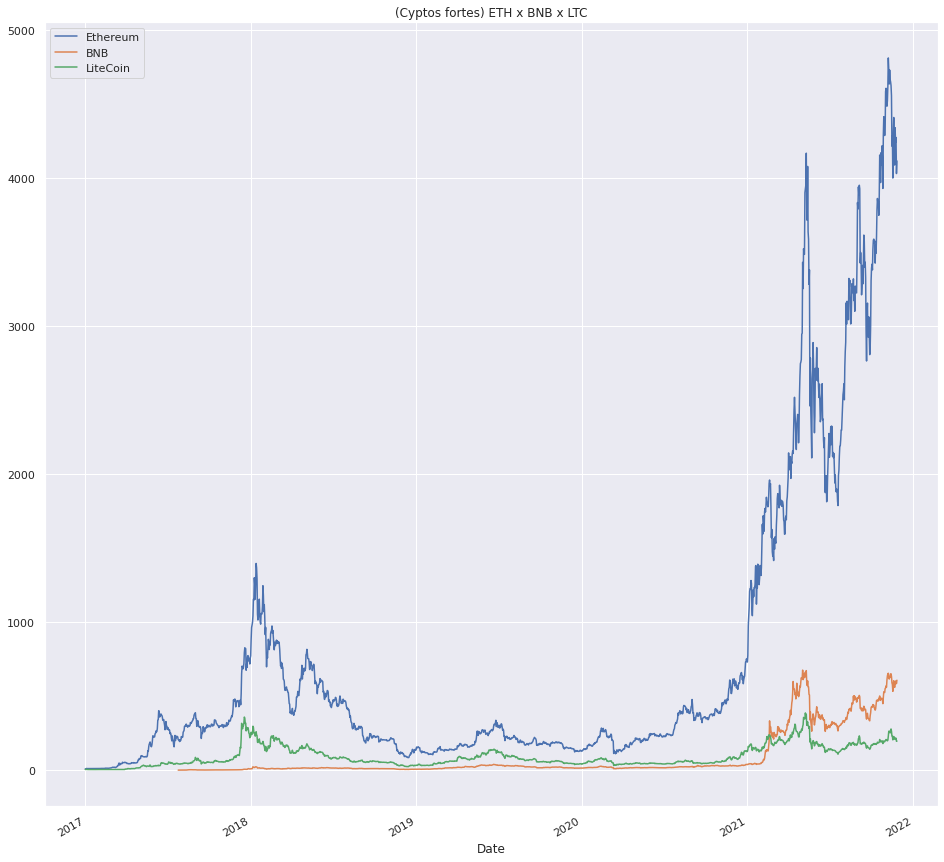

In [ ]:
eth.plot(figsize=(16,16),label="Ethereum",title='(Cyptos fortes) ETH x BNB x LTC')
bnb.plot(label="BNB")
ltc.plot(label="LiteCoin")
plt.legend()
# Retirando o Bitcoin.
# Nota-se o Ethereum é a que tem mais influência no mercado, mas com uma diferença relativamente menor em relação as outras.
# Possibilitando uma melhor análise.

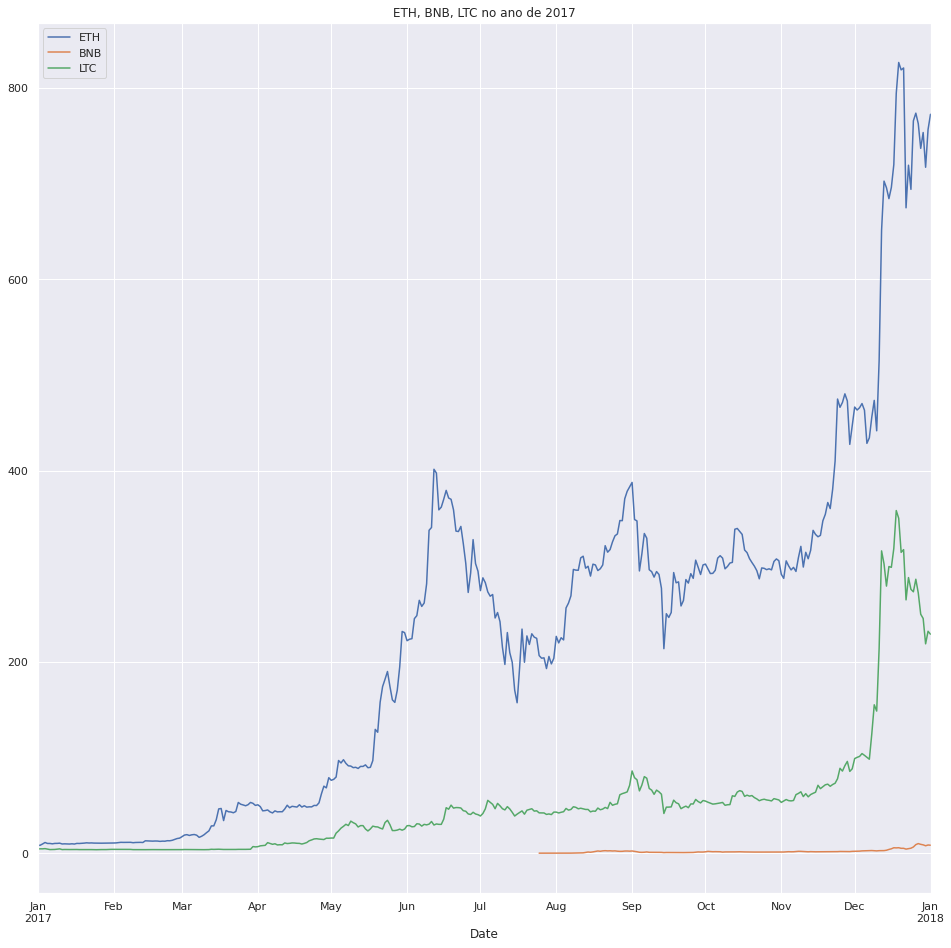

In [ ]:
# ETH, BNB, LTC no ano de 2017
eth2017.plot(figsize=(16,16),label="ETH",title='ETH, BNB, LTC no ano de 2017')
bnb2017.plot(label="BNB")
ltc2017.plot(label="LTC")
plt.legend()
# Analisando o gráfico, nota-se variações similares entre as criptomoedas.

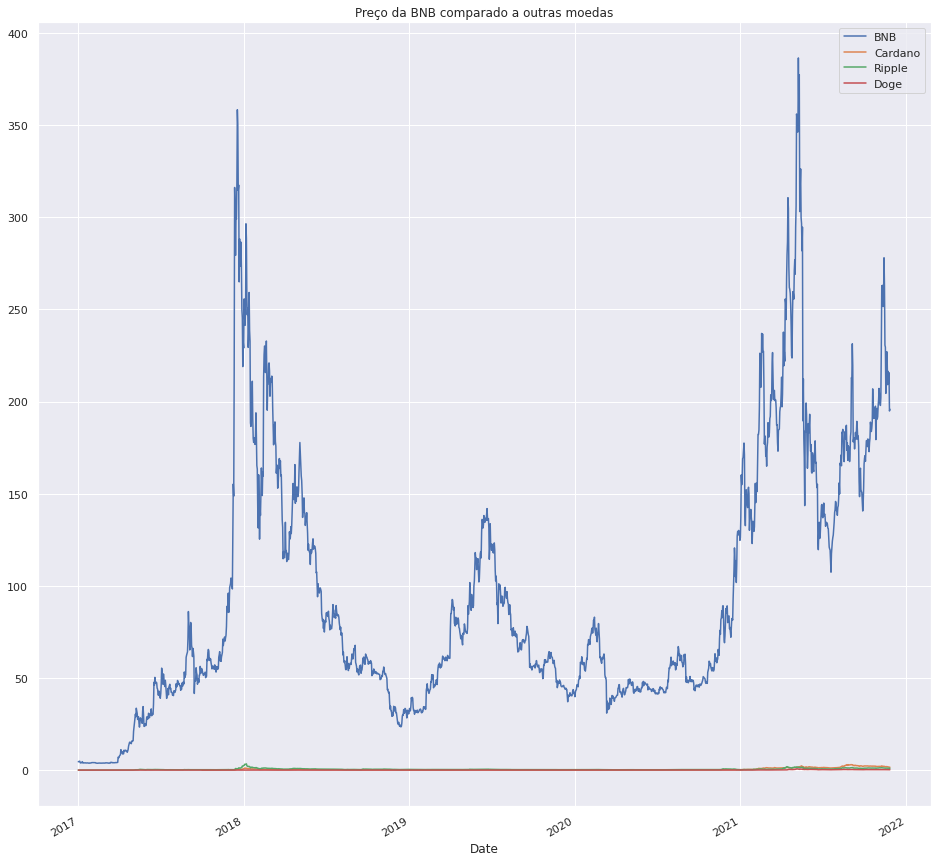

In [ ]:
ltc.plot(figsize=(16,16),label="BNB",title='Preço da BNB comparado a outras moedas')
ada.plot(label="Cardano")
xrp.plot(label="Ripple")
doge.plot(label="Doge")
plt.legend()
# Comparando as grandes moedas com as outras.
# Assim como foi a comparação com o Bitcoin, trata-se de escala de valores diferentes.

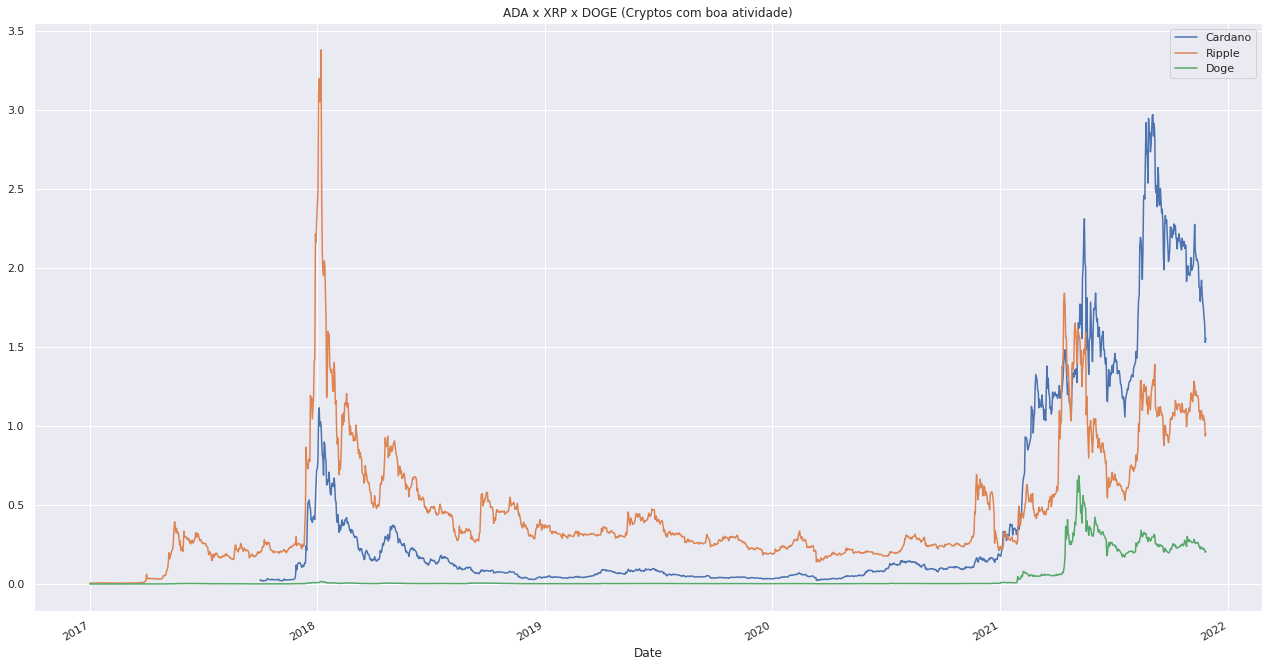

In [ ]:
ada.plot(figsize=(22,12),label="Cardano", title='ADA x XRP x DOGE (Cryptos com boa atividade)')
xrp.plot(label="Ripple")
doge.plot(label="Doge")
plt.legend()
# Apesar de escala de valores diferentes das grandes criptomoedas, apresentam bastante atividade no mercado.

## Elon Musk & a Explosão das Criptomoedas

[*********************100%***********************]  5 of 5 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f414a0db610>,
      dtype=object)

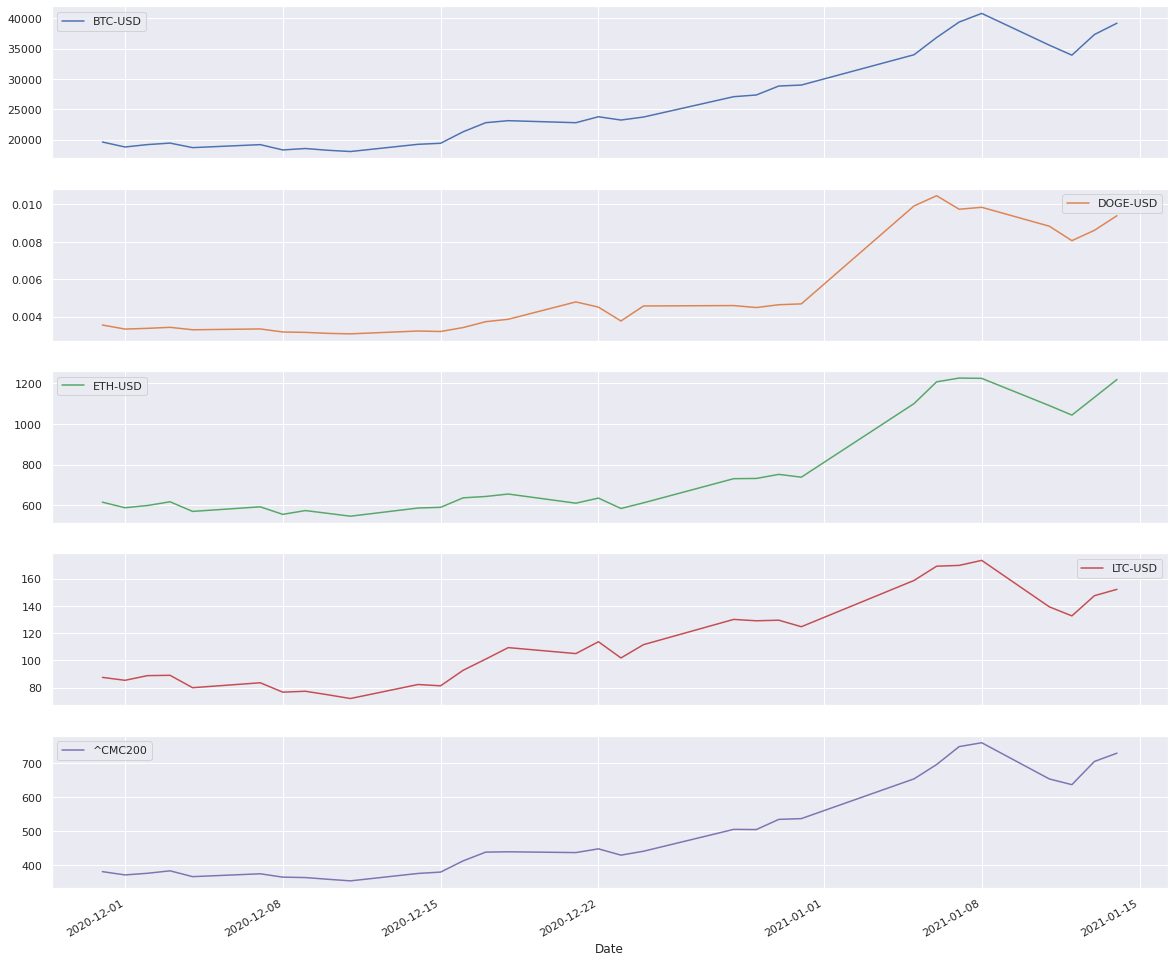

In [ ]:
moedasElon = web.get_data_yahoo(['BTC-USD','ETH-USD','LTC-USD','DOGE-USD','^CMC200'],start='2020-11-30',end="2021-01-15")["Close"]
moedasElon = moedasElon.dropna()
sns.set()
moedasElon.plot(subplots=True,figsize=(20,18))

O efeito Elon Musk, porém, **pode ser mais limitado do que se imagina**. Mesmo seu tweet do dia 20 de Dezembro direcionado à dogecoin impactou a moeda tanto quanto se imaginava. Elon parace ter apenas se pronunciado logo antes de uma alta que já estava para acontecer. 

Ou talvez o mercado apenas tenha **demorado para reagir às declarações do bilionário** e ele foi, de fato, responsável pelo pontapé que explodiu os valores de cripto em 2021. Notícias sobre seu apoio a criptomoedas correram o mundo nas semanas seguintas às suas declarações, e isso pode ter incentivado novos investimentos em cripto mesmo meses após as primeiras falas de Musk.

# Gráficos de correlação 

##Mercado das Cryptos Vs Ouro e Petróleo 

Criptomoedas são frequentemente comparadas a metais preciosos. Decidimos, então, procurar alguma correlação entre a cotação do ouro e o *black gold* (petróleo) e o valor do bitcoin. 

Com que hipoteses começamos essa seção? Alguns investidores do bitcoin também são entusias do mercado de ouro, e preço do barril de petróleo interfere em diversos aspectos da economia, incluindo o mercado de energia - importante para a mineiração do bitcoin. 

Nossa análise, porém, parece demonstrar que  mercados não interferem uns nos outros. 

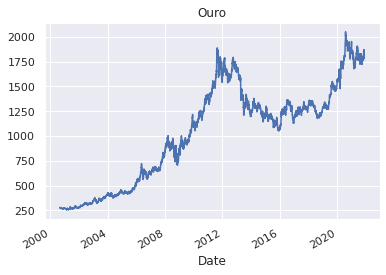

In [ ]:
ouro.plot(title='Ouro')

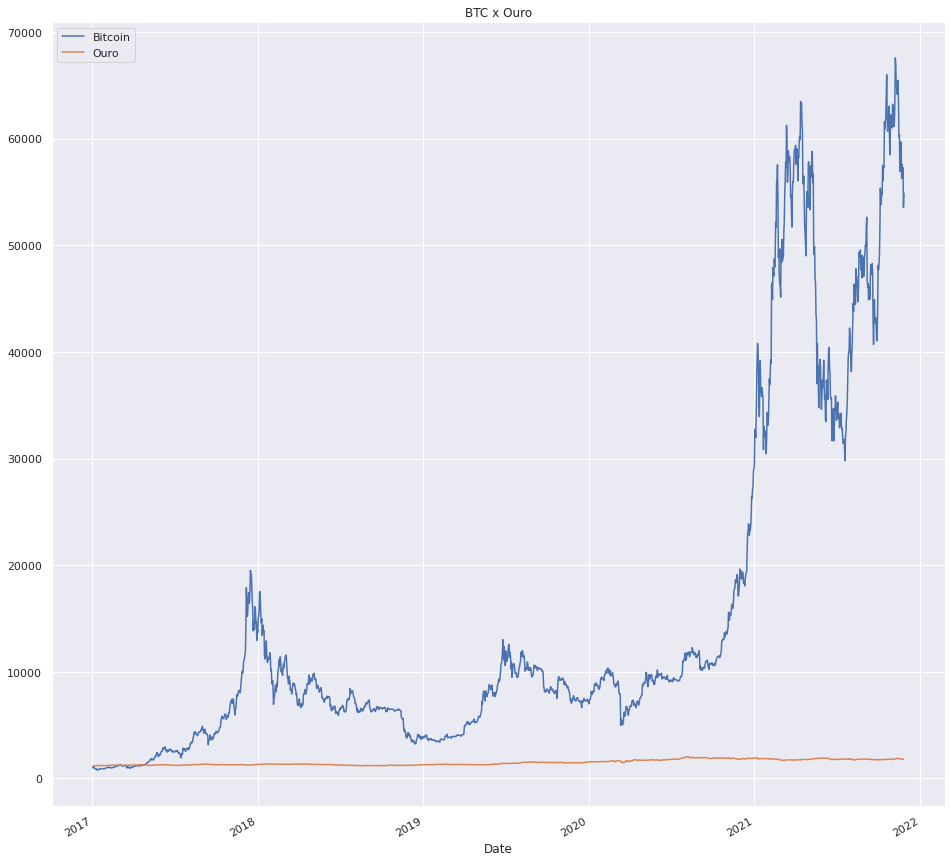

In [ ]:
btc.plot(figsize=(16,16),label='Bitcoin',title='BTC x Ouro' )
ouro1.plot(label='Ouro')
plt.legend()
# Escala de valores muito diferentes. Nota-se que o bitcoin teve um valor inferior ao do ouro. até  meados de 2017

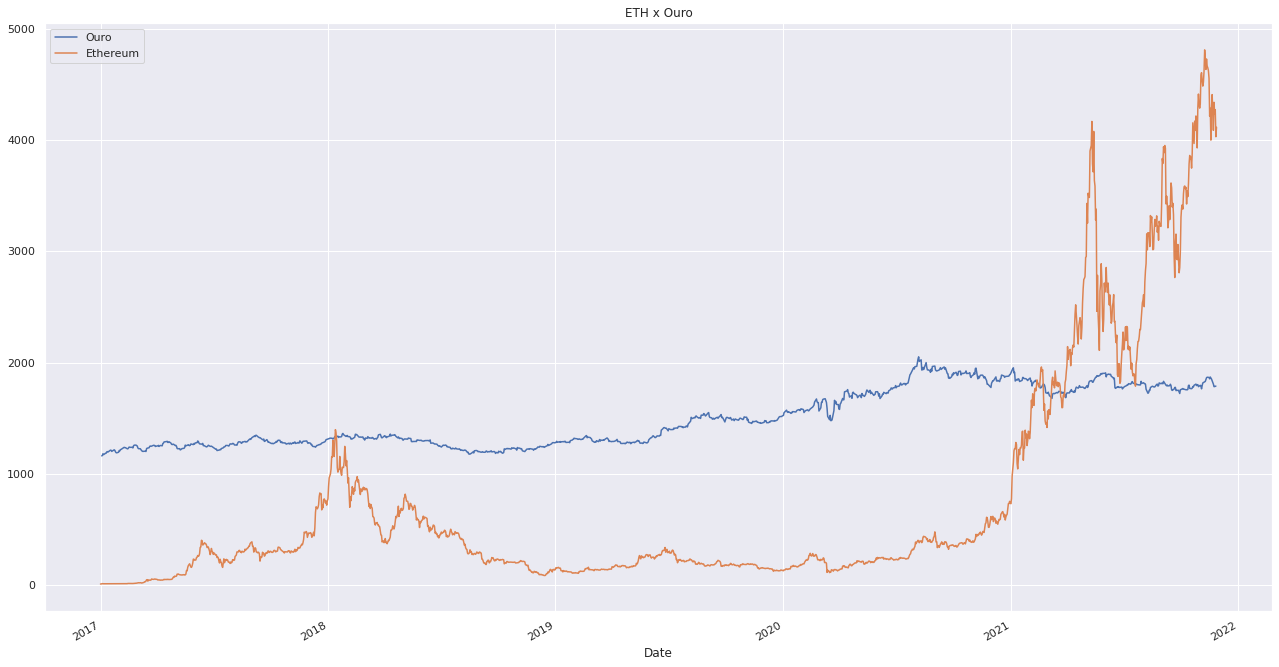

In [ ]:
ouro1.plot(figsize=(22,12),label='Ouro',title='ETH x Ouro')
eth.plot(label='Ethereum')
plt.legend()
# Ethereum é uma crypto que apresenta valores mais similares ao do ouro, facilitando análises gráficas.
# Podemos ver que o mercado de ouro apresenta uma certa estabilidade  
# Enquanto o Ethereum se mostra bem mais volátil, com potêncial de crescimento extrondoso 

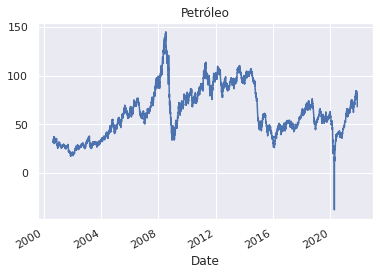

In [ ]:
crude.plot(title='Petróleo')

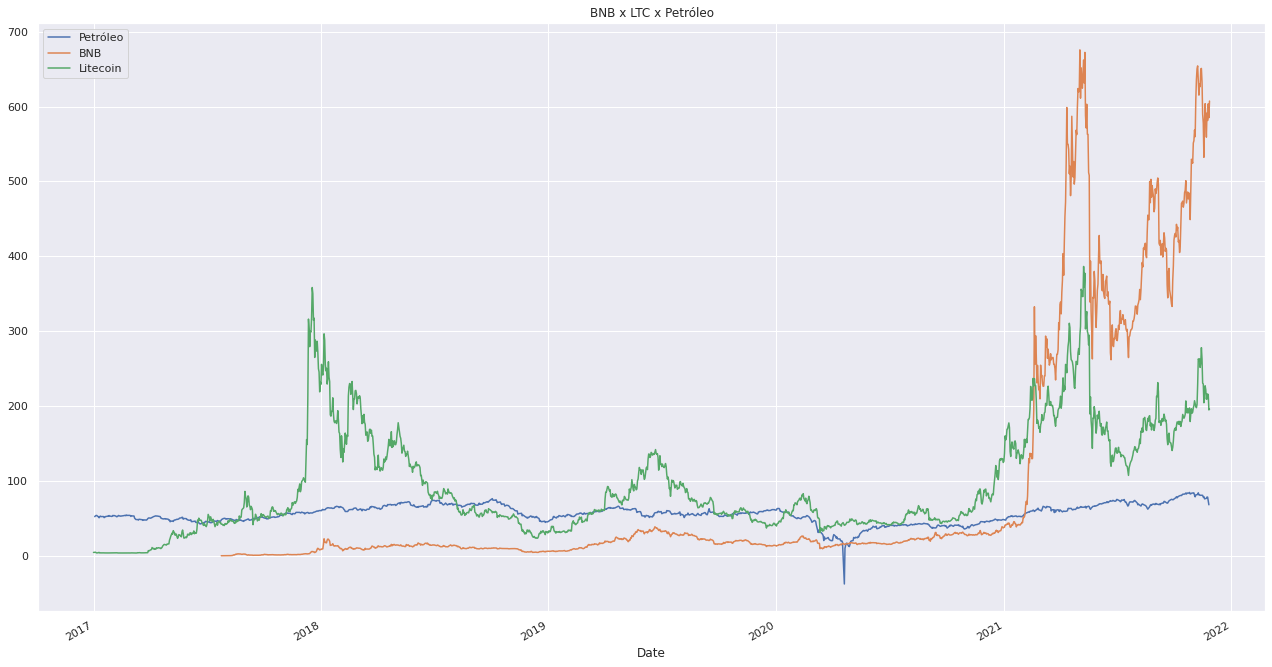

In [ ]:
crude1.plot(figsize=(22,12),label='Petróleo',title='BNB x LTC x Petróleo')
bnb.plot(label='BNB')
ltc.plot(label='Litecoin')
plt.legend()
# BNB e Litecoin são as crypto que apresenta valores mais similares.
# Novamente vemos um mercado das criptomoedas mais ativo e com grande margem exploração. 

##Correlação das moedas com bitcoin

[*********************100%***********************]  7 of 7 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4149cdba50>,
      dtype=object)

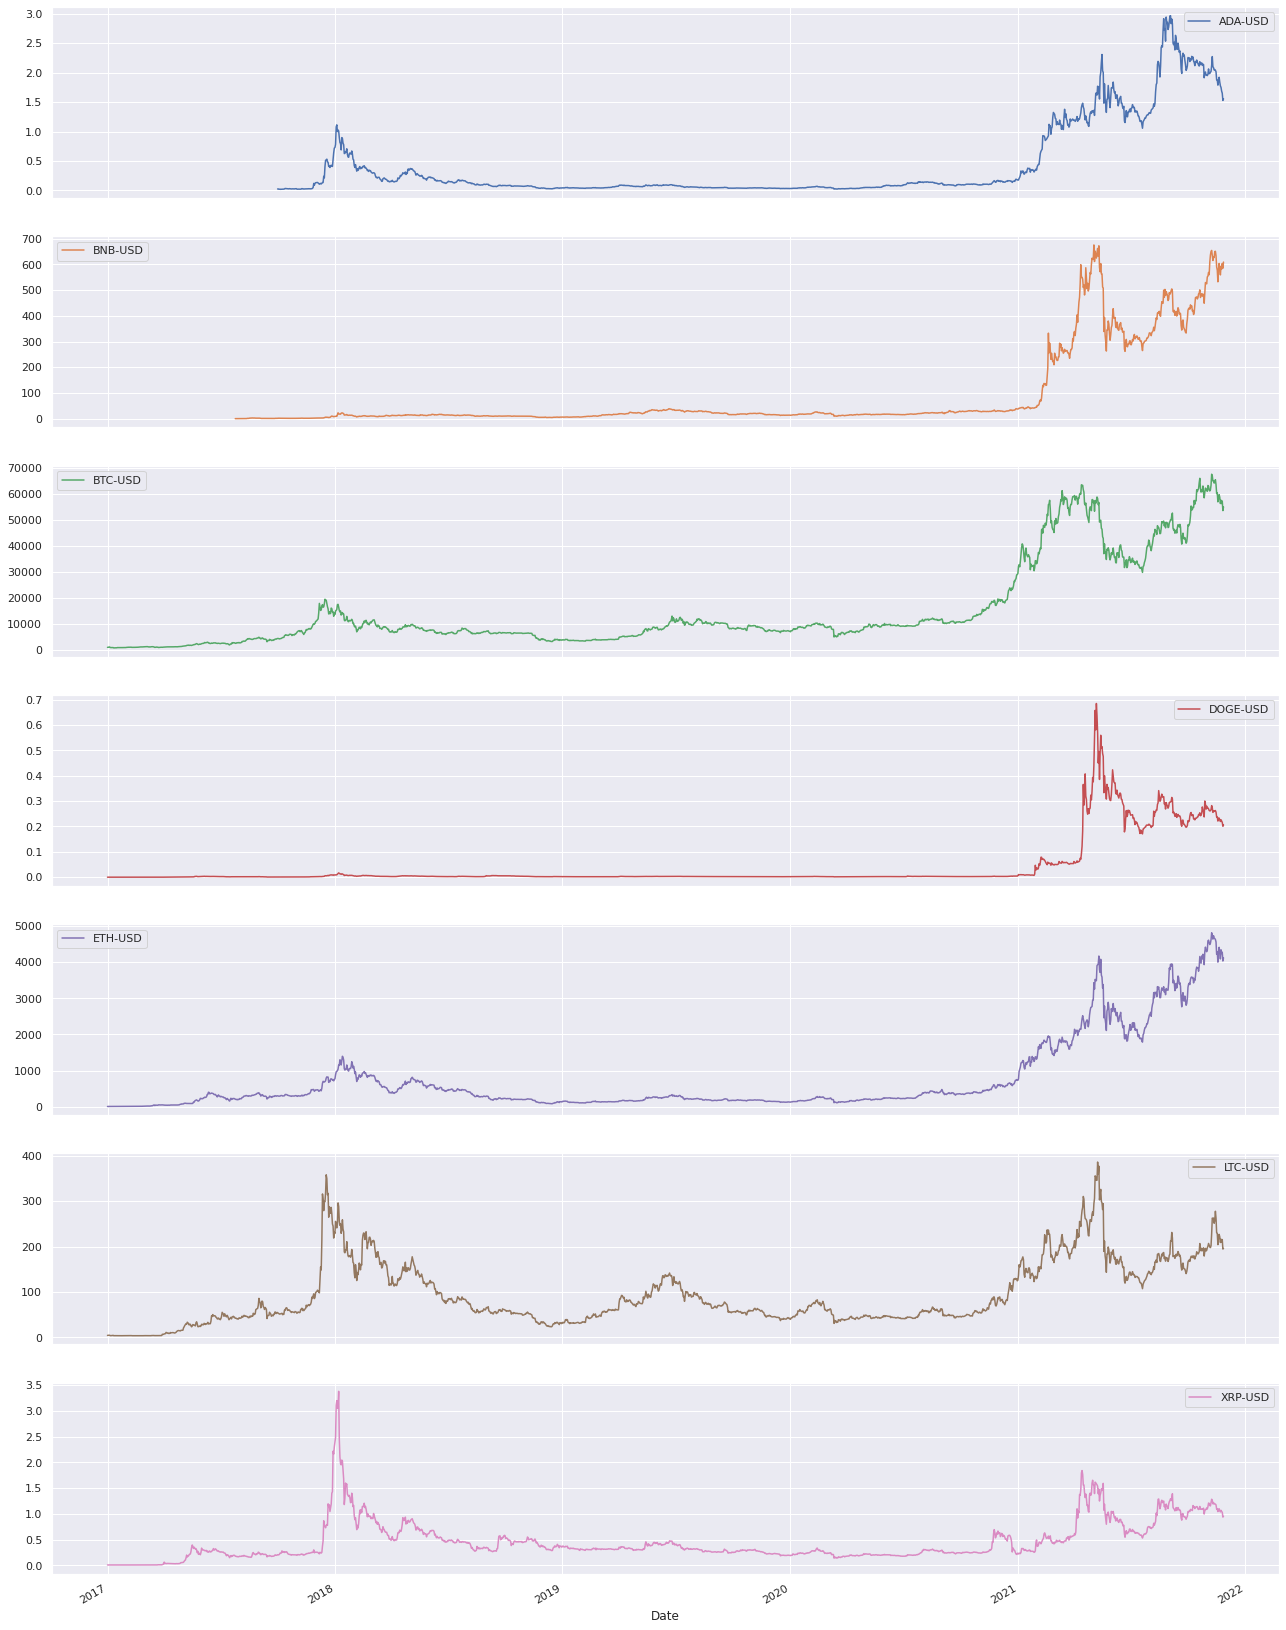

In [ ]:
moedas = web.get_data_yahoo(['BTC-USD','ETH-USD','LTC-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD'],start='2017-01-01')["Close"]
sns.set()
moedas.plot(subplots=True,figsize=(22,32))

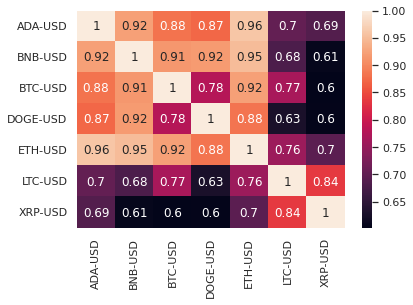

In [ ]:
sns.heatmap(moedas.corr(), annot=True)
# Litecoin e XRP são as criptomoedas que menos se parecem com o resto do mercado
# A dogecoin, apesar de ser primariamente especulativa, tende a se movimentar junto ao mercado de cripto em geral
# O Etherium tem valor mais correlacionado ao mercado de cripto geral do que o bitcoin


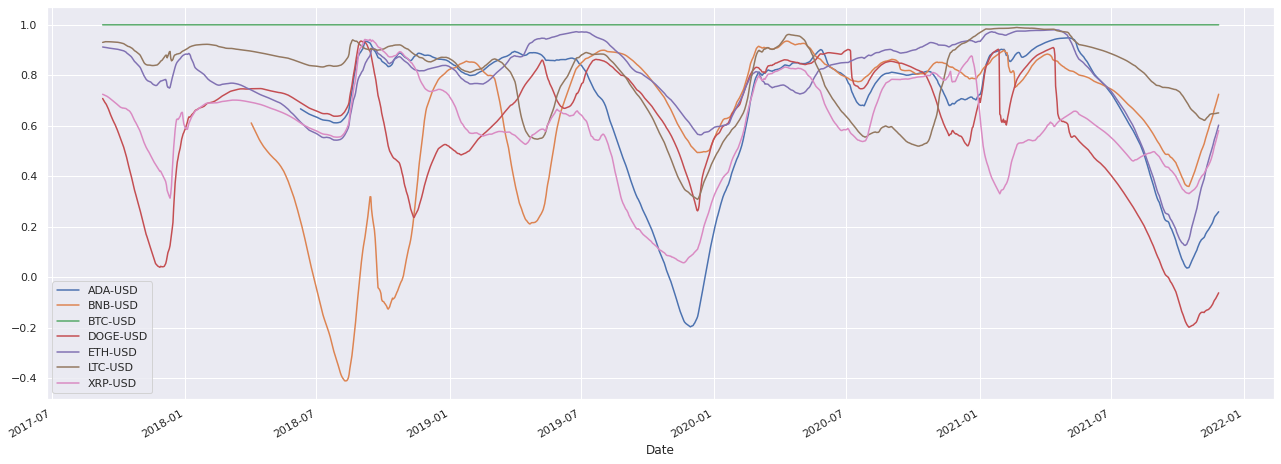

In [ ]:
moedas['BTC-USD'].rolling(252).corr(moedas).plot(figsize=(22,8))

[*********************100%***********************]  8 of 8 completed


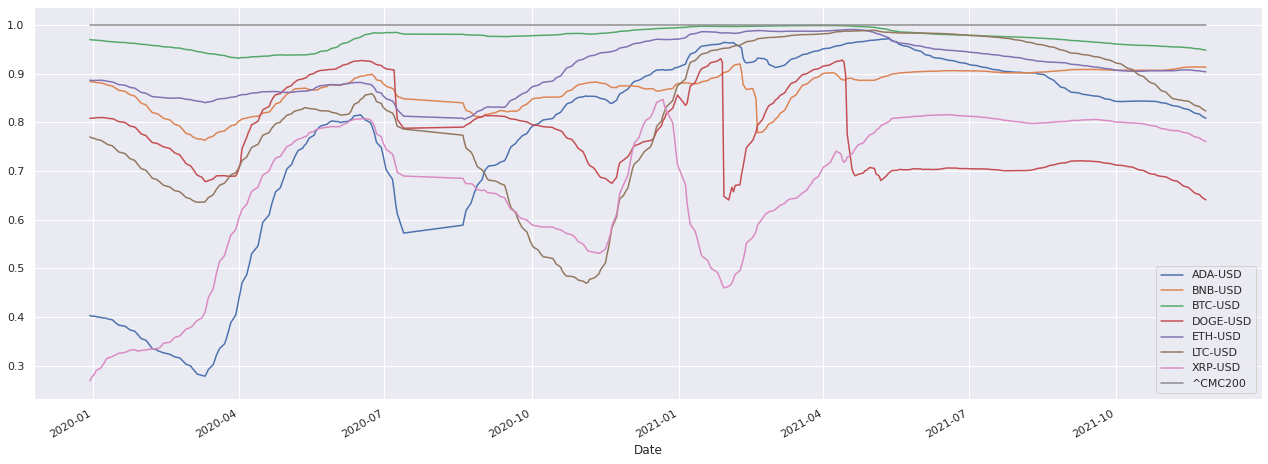

In [ ]:
indicecorr = web.get_data_yahoo(['BTC-USD','ETH-USD','LTC-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD','^CMC200'],start='2017-01-01')["Close"]
indicecorr=indicecorr.dropna()
indicecorr['^CMC200'].rolling(252).corr(indicecorr).plot(figsize=(22,8))

#dados completos da CMC200 só estão disponíveis para 2020. Apesar do dataset menor, é possível notar que vales de correlação correspondentes no gráfico com o bitcoin
#são muito menos ingrimes quando utilizamos o CMC200 como parâmetro. A linha de correlação entre cada moeda também é mais estável no CMC200

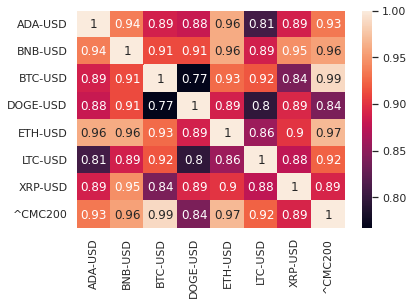

In [ ]:
sns.heatmap(indicecorr.corr(), annot=True)

O índice CMC é mais correlacionada às moedas outliers (XRP e LTC), e tem uma correlação muito alta com o valor do bitcoin e do etherium

Esse heatmap nos mostra que tanto o Bitcoin como o Etherium e o CMC200 são bons indicadores da direção do mercado de cripto como um todo. Podemos notar que mesmo os vales de menor correlação entre o bitcoin e outras moedas tentedem a ser replicados quando comparados ao Etherium e CMC200

A principal vantagem do CMC200 é sua maior proximidade com o valor de criptomoedas não tão populares, e, em momentos de divergência entre os valores de certas criptos e o bitcoin, tais valores divergem menos quando relacionados ao índice. 

##BTC correlação com ETH e ÍndiceCMC

Bitcoin e Etherium são as maiores criptomoedas do mercado, e estão fortemente correlacionadas. Vamos verificar essa relação?

[*********************100%***********************]  2 of 2 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f414a506490>,
      dtype=object)

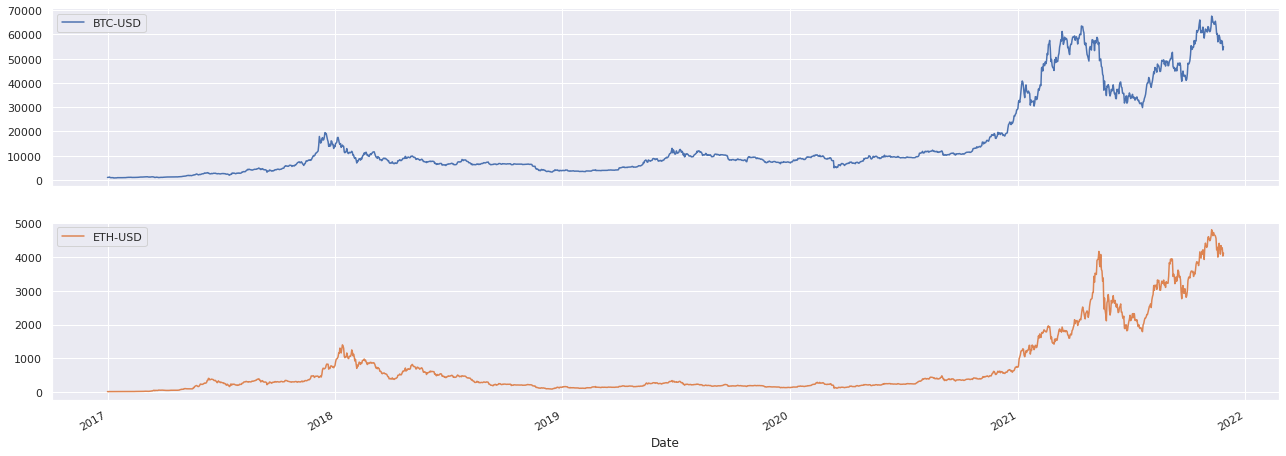

In [ ]:
BTCvsETH = web.get_data_yahoo(['BTC-USD','ETH-USD',],start='2017-01-01')["Close"]
BTCvsETH = BTCvsETH.dropna()
BTCvsETH.plot(subplots=True,figsize=(22,8))

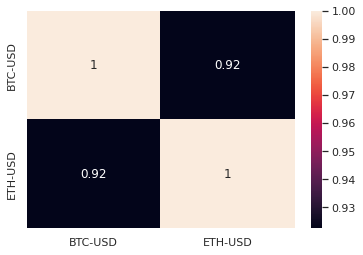

In [ ]:
sns.heatmap(BTCvsETH.corr(), annot=True)

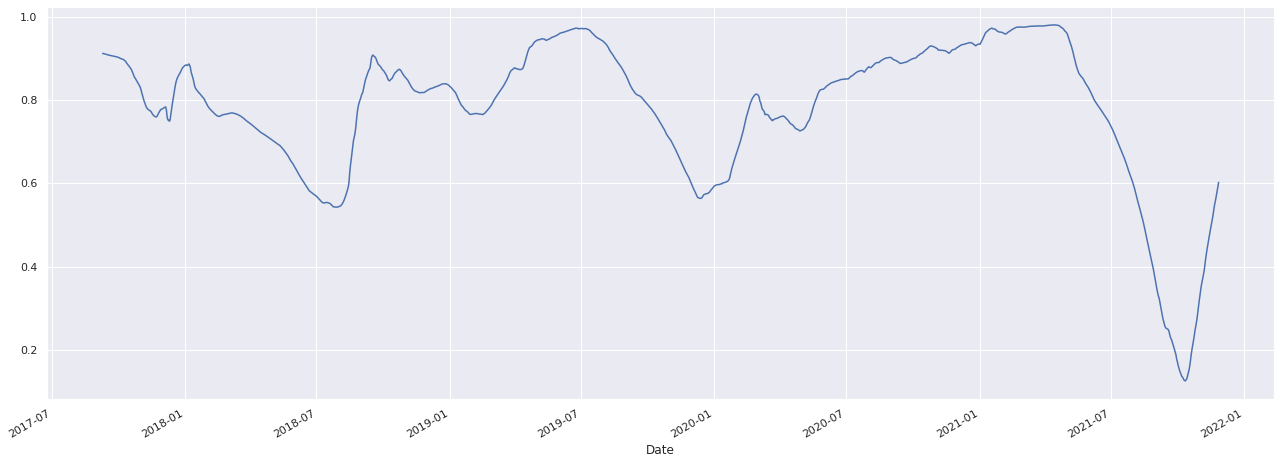

In [ ]:
BTCvsETH['BTC-USD'].rolling(252).corr(BTCvsETH['ETH-USD']).plot(figsize=(22,8))
#A correlação entre bitcoin e Etherium caiu substancialmente em 2021. Nesse mesmo período

[*********************100%***********************]  2 of 2 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4149baea10>,
      dtype=object)

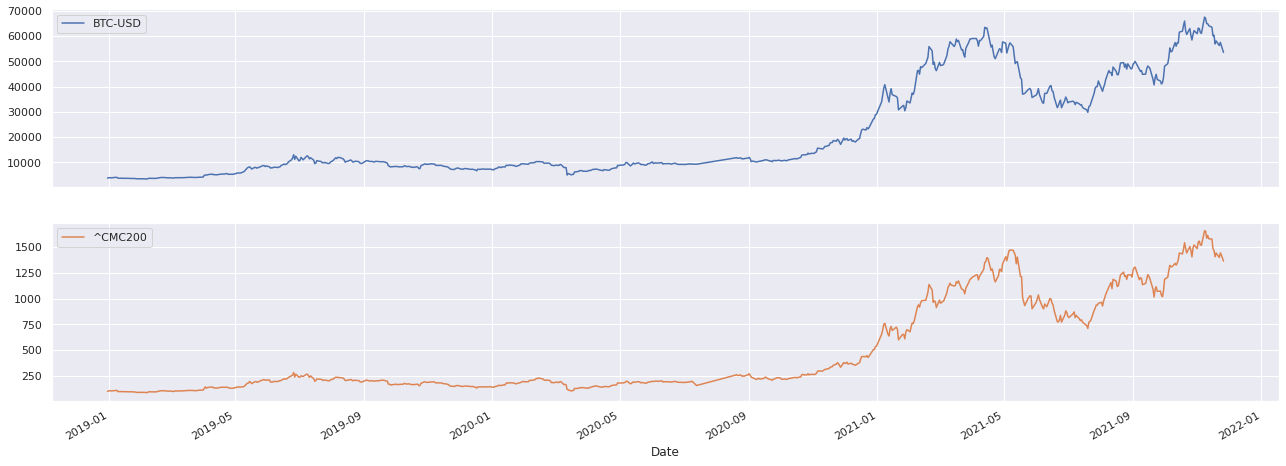

In [ ]:
BTCvsÍndice = web.get_data_yahoo(['BTC-USD','^CMC200'],start='2017-01-01')["Close"]
BTCvsÍndice = BTCvsÍndice.dropna()
BTCvsÍndice.plot(subplots=True,figsize=(22,8))

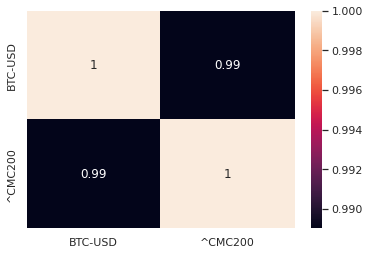

In [ ]:
sns.heatmap(BTCvsÍndice.corr(), annot=True)

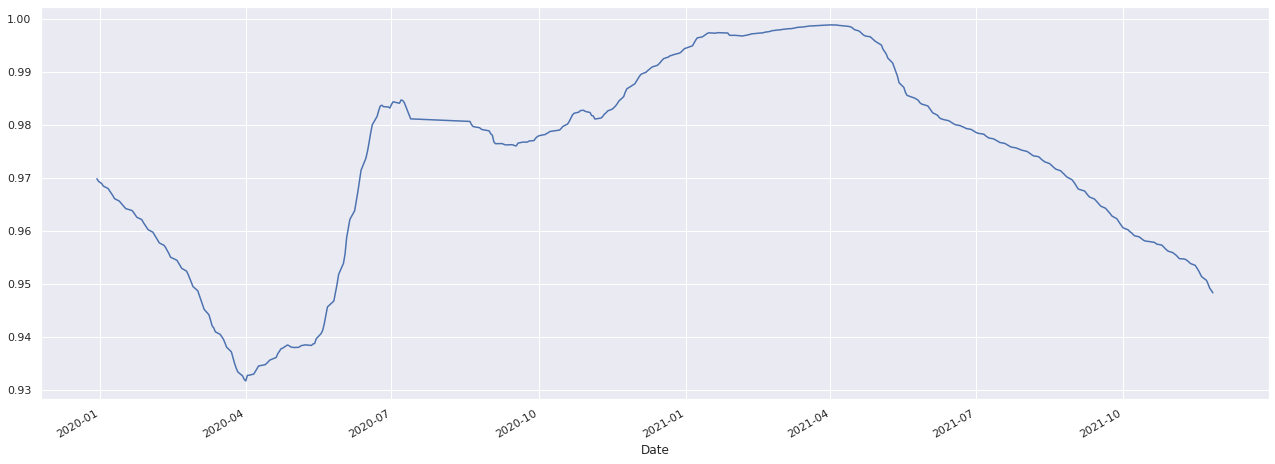

In [ ]:
BTCvsÍndice['BTC-USD'].rolling(252).corr(BTCvsÍndice['^CMC200']).plot(figsize=(22,8))


A CMC200 é uma representação mais precisa do mercado de critomoedas em geral do que o bitcoin, como se é esperado para um índice. Porém, seus valores são extremamente correlacionados,, e possuem correlações muito similares para outras criptomoedas. O mesmo é verdade para o Etherium, segunda critomoeda mais popular do mercado.

Isso significa que, para aplicações mais simples, **a cotação de tanto o Bitcoin como do Litecoin podem ser utilizada com um índice do mercado de criptomoedas como um todo**. Isso é especialmente útil pois o índice CMC foi lançada apenas em 2019, o que dificulta análises históricas sobre o mercado de cripto

##Correlação ações das empresas de hardware com o BITCOIN

O bitcoin e outras criptomoedas que utilizam a tecnologia blockchain utilizam recursos computacionais, tipicamente de GPUs (placas de vídeo). Em anos recentes, a mineiração de criptomoedas foi condenada como responsável pela menor oferta de GPUs e subsequente aumentos de seus preços. Em 2021, é praticamente impossível encontrar uma GPU sendo vendida pelo preço sugerido pelo fabricante - o que torna difícil encontrar dados sobre preços de mercado das placas de vídeo.

Porém, ainda é interessante observar a relação entre o preço do bitcoin (que, como explicado anteriormente, pode servir como um índice para  o mercado de cripto) e o market CAP de empresas fabricantes de hardware

AMD e Nvidea dividem um quase oligopólio na produção de placas de vídeo dedicadas, enquanto a Intel é mais focada na produção de CPUs, outra peça importante para o funcionamento de computadores, mas que não é necessária para o mercado de cripto. A AMD produz tanto GPUs quanto CPUs, enquanto a NVidea é quase exclusivamente focada na produção de GPUs

[*********************100%***********************]  4 of 4 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41470c2950>,
      dtype=object)

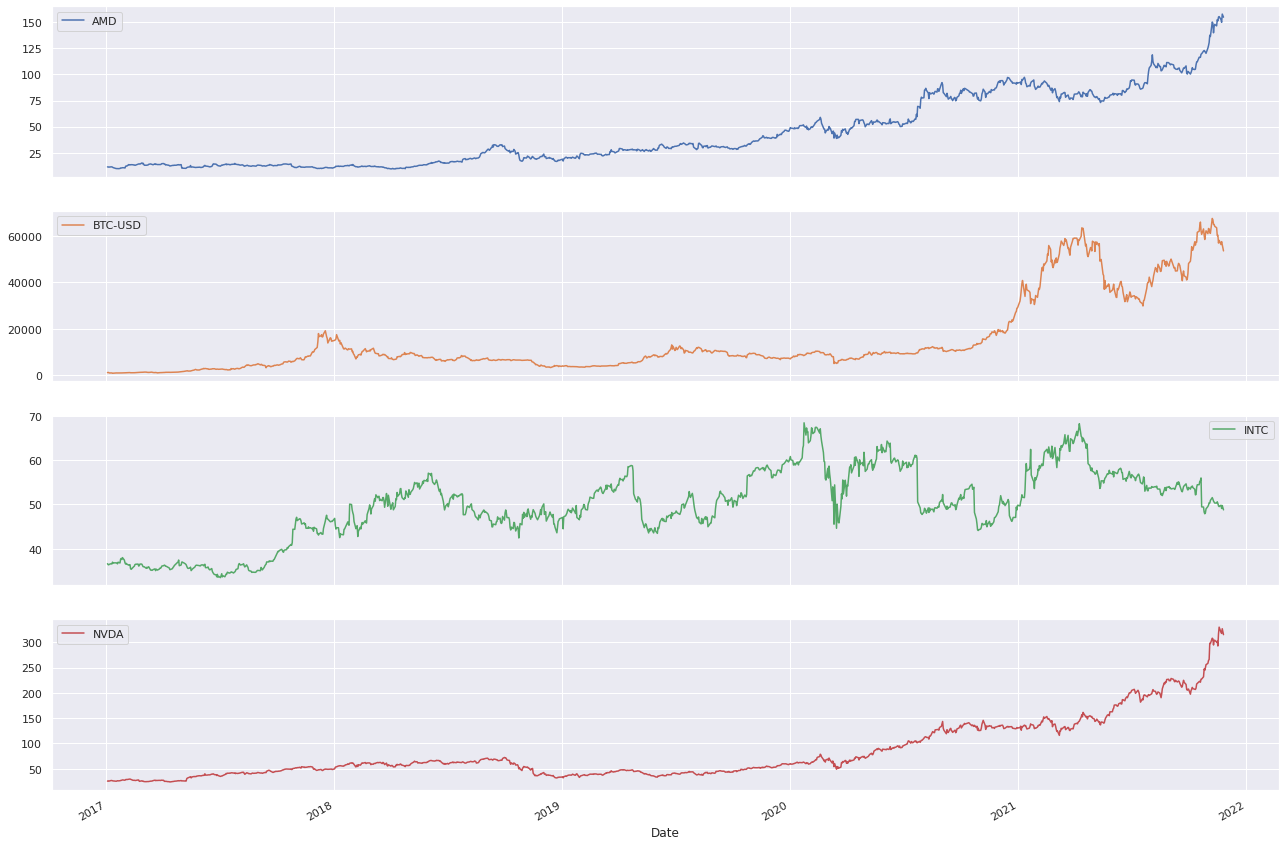

In [ ]:
pecas = web.get_data_yahoo(['BTC-USD','AMD','INTC','NVDA'],start='2017-01-01')["Close"]
pecas = pecas.dropna()
pecas.plot(subplots=True,figsize=(22,16))

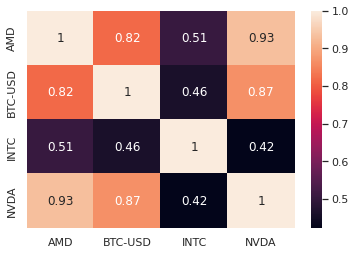

In [ ]:
sns.heatmap(pecas.corr(), annot=True)
#Bitcoin é a cripto com maior correlação quanto às empresas fabricantes de placas de vídeo

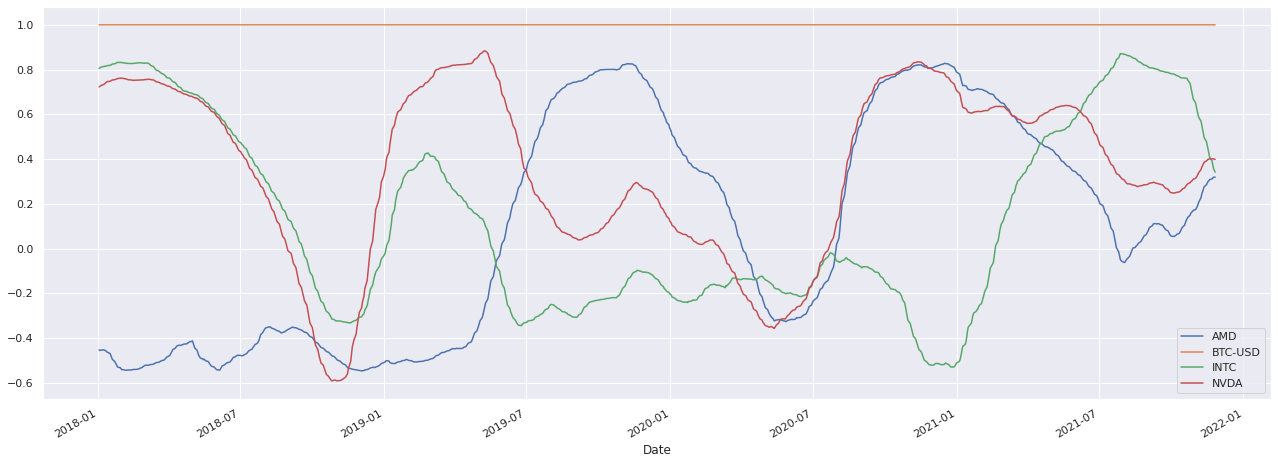

In [ ]:
pecas['BTC-USD'].rolling(252).corr(pecas).plot(figsize=(22,8))


Vemos que os valores de criptomoedas está fortemente correlacionada ao valor das ações da NVIDEA e AMD, mas não da Intel - o resultado esperado. Estranhamente, a correlação entre a Intel e as outras duas fabricantes de hardware também são fracamente correlacionadas, mesmo quando a AMD também fabrica CPUs. Porém, as ações AMD estão menos fortemente correlacionadas às ações do bitcoin do que as ações da Nvidea, e se encontram mais próximas das ações da AMD


##Correlação de índices bolsas com o bitcoin

[*********************100%***********************]  9 of 9 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4146df4890>,
      dtype=object)

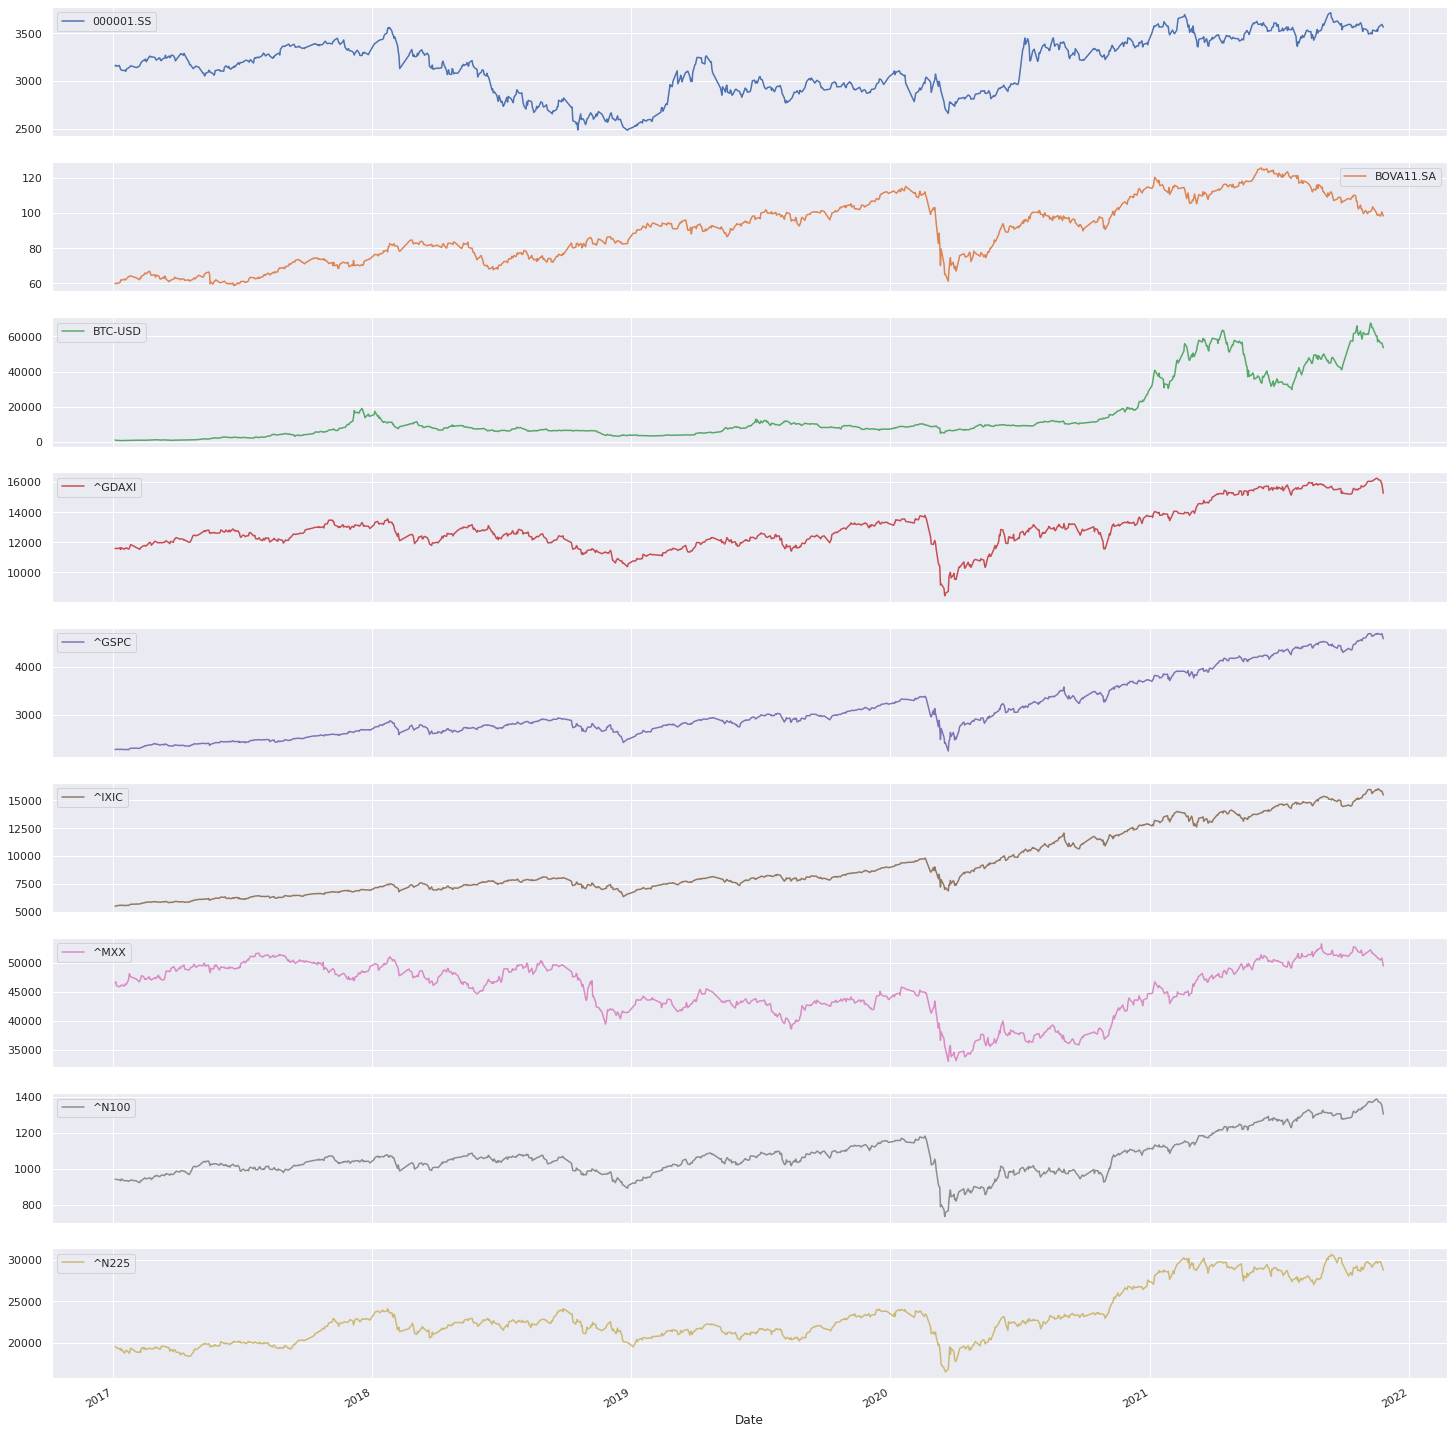

In [ ]:
acoes = web.get_data_yahoo(['BTC-USD','^GSPC','^IXIC','^GDAXI','BOVA11.SA','^N100','^MXX',"000001.SS",'^N225' ],start='2017-01-01')["Close"]
acoes = acoes.dropna()
acoes.plot(subplots=True,figsize=(25,28))
#^GSPC é o índice ISP500
#^IXIC é o composito NASDAQ
#^GDAXI é o composite da bolsa de Berlim
#^N100 é o índice EURONEXT00
#BOVA11.SA é o composite da bolsa de São Paulo
#^MXX é o composite da bolsa de valores mexicana
#000001.SS é o composite da bolsa de Shangai 
#^N225 é o composite da bolsa de valores japonesa

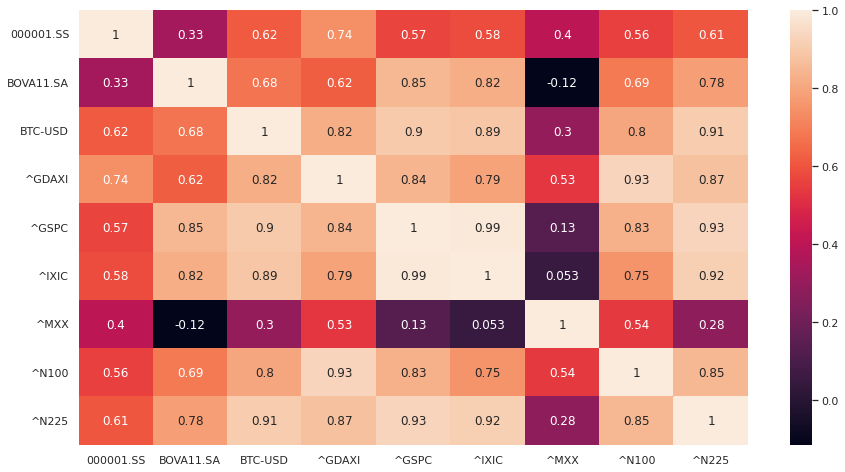

In [ ]:
f, ax = plt.subplots(figsize=(15, 8)) #controla o tamanho do gráfico
sns.heatmap(acoes.corr(), annot=True)
#Bolsas de mercados europeus e americanos são fortemente correlacionadas. Estas tem a correlação mais próxima com o Bitcoin
#^GSPC é o índice ISP500
#^IXIC é o composito NASDAQ
#^GDAXI é o composite da bolsa de Berlim
#^N100 é o índice EURONEXT00
#BOVA11.SA é o composite da bolsa de São Paulo
#^MXX é o composite da bolsa de valores mexicana
#000001.SS é o composite da bolsa de Shangai 
#^N225 é o composite da bolsa de valores japonesa

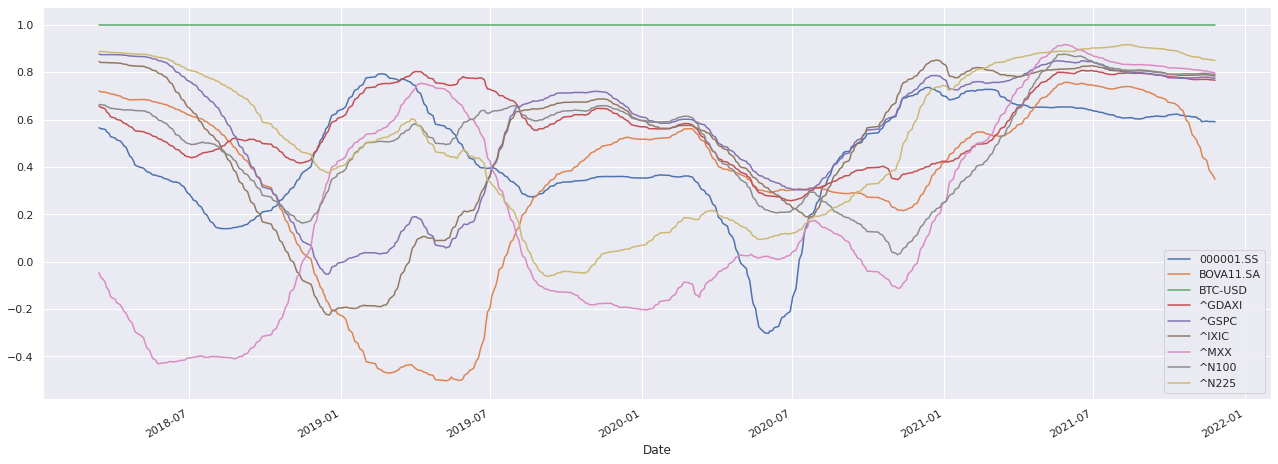

In [ ]:
acoes['BTC-USD'].rolling(252).corr(acoes).plot(figsize=(22,8))

Existe uma razoável correlação entre os valores de bolsas de valores mundiais e o preço do bitcoin, especial para **bolsas bem consolidadas em países desenvolvidos**. A explosão de criptomoedas em 2021 aumentou significativa a correlação entre o Bitcoin e essas Bolsas de valores. É provável que isso seja um sinal da consolidação das criptomoedas como forma de investimento

Bolsas de países subdesenvolvidos, como o Brasil e o México, possuem cotações divergentes daquelas vistas em países desenvolvidos, e, consequentemente, de bitcoins

Bolsas chinesas também são outliers comparados com bolsas de outras regiões. Apesar dos esforços do partido comunista chinês, o bitcoin ainda é popular na China, e isso pode explicar a correlação mediana relativamente estável entre a cotação da bolsa de Shangai e os preços do bitcoin

# Conclusões
O mercado de criptomoeda é extremamente volátil, mas **deve manter sua tendência ascendente pelos próximos anos.** O principal motivo para isso é que o mercado ainda **está longe de atingir seu potencial.** É provavel que a atual alta das critomoedas seja seguida de uma queda em seu valor, seguida por um período de relativa estabilida, seguida por picos ainda mais altos de cotação - que façam com que os valores atingidos pelo bitcoin em 2021 pareçam migalhas. **Um cenário similar ao que aconteceu entre o pico de 2018 e o pico de 2021.**

Essa extrema volatilidade torna **extremamente difícil** modelar futuros preços de criptomoedas, já que mudanças no mercado por vezes **mudam radicalmente o tendência de sua cotação.**

É interessante notar que **o bitcoin continua um bom índice para o mercado de cripto como um todo**, mesmo após a explosão recente na poularidade de criptomoedas. 

Outra conclusão interessante é que **o mercado de criptomoedas já possui uma considerável correlação com as bolsas de valores de países desenvolvidos**, de modo geral, e é provável que essa correlação aumente nos próximos anos, na medida em que **os investimentos em cripto se tornem mais comuns à diversos portfólios.** 

O valor das ações de empresas fabricantes de GPU - utilizadas na mineiração de bitcoin e outras criptos - **já está fortemente correlacionado ao valor do mercado de cripto.** Um investidor que se interesse por criptomoedas, mas deseje diminuir sua exposição ao risco, talvez encontre na AMD ou NVidea uma opção interessante de investimento.

